# 0. IMPORT LIBRARIES

In [1]:
globals().clear
import time
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline
from datetime import datetime
pd.options.display.max_rows = 5000
pd.options.display.max_columns = 500

In [2]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

import tensorflow       as tf
import keras.optimizers as op
from tensorflow                     import keras
from tensorflow.keras.models        import Sequential
from tensorflow.keras.layers        import Dense
from tensorflow.keras.layers        import Dropout
from tensorflow.keras.optimizers    import Adam

# 1. LOAD AND FORMAT DATA

In [4]:
#Load Dataset
df = pd.read_csv('/Users/stevenwhang/Capstone/Datasets/df.csv')
DATETIME = df.DATETIME
df.shape

(10843, 75)

In [4]:
# Load dataset
path = '/content/drive/MyDrive/CapstoneProject/code/02. Machine Learning/data/'
file = 'df.csv'
df = pd.read_csv(path+file)
DATETIME = df.DATETIME
df.shape

(10758, 75)

# 2. CREATE THE MODEL: Train 60 days and predict 15 minutes

In [5]:
import time
file_name = 'MLP.60d.15min'
step_rows  = 1        #22*20 #110 (15 minutes)
total_rows = 10758    #489*22     (24 months)
train_rows = 60*22 #420*22 #9240  (03 months)

scale_X = MinMaxScaler()
model = Sequential()
model.add(Dense(100, activation = 'relu', input_dim = df.iloc[:,1:-1].shape[1]))  # initiating with 100 neurons
model.add(Dropout(0.25))                                                          # adding dropout to avoid overfitting
model.add(Dense(1))                                                               # output layer

opt = Adam(amsgrad = True, lr = 0.001, beta_1 = 0.79, beta_2 = 0.999)             # using Adam optimizer, at a learning rate of 0.001
model.compile(loss = 'mse', optimizer = opt)                                      # compiling model

result = pd.DataFrame(columns = ['DATETIME', 'ACTUAL', 'PREDICTED', 'DIFFERENCE', 'TRAIN_DURATION'])

for i in range(0, total_rows - train_rows, step_rows):
  
  st = time.time()
  # 1. Obtain X and y
  train, test = df.iloc[i:train_rows+i, 1:], df.iloc[train_rows+i:train_rows+i+step_rows, 1:]
  X_train, y_train  = train.iloc[:,:-1], train.iloc[:,-1]
  X_test , y_test   = test.iloc[:,:-1] , test.iloc[:,-1]

  # 2. Scale X
  X_train = scale_X.fit_transform(X_train)
  X_test = scale_X.transform(X_test)
  
  # 3. Fit and Predict 
  model.fit(X_train, y_train)
  y_hat = model.predict(X_test, verbose=False)
  et = time.time()
  # 4. Save data with prediction
  fecha = DATETIME.iloc[train_rows+i:train_rows+i+step_rows]
  datos = {'DATETIME': fecha.ravel(), 'ACTUAL': y_test.ravel(), 'PREDICTED': y_hat.ravel(), 'DIFFERENCE': abs(y_hat.ravel()-y_test.ravel()), 'TRAIN_DURATION': np.full(y_hat.ravel().shape[0], et-st)}
  data = pd.DataFrame(data = datos)
  result = result.append(data)

  print("Count Down: ",  math.trunc((total_rows-train_rows-i)/step_rows))
  #print(data.head())


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


42/42 [==============================] - 0s 948us/step - loss: 74596.5000
Count Down:  9438
42/42 [==============================] - 0s 960us/step - loss: 71159.2891
Count Down:  9437
42/42 [==============================] - 0s 959us/step - loss: 65327.1094
Count Down:  9436
42/42 [==============================] - 0s 982us/step - loss: 57634.7461
Count Down:  9435
42/42 [==============================] - 0s 974us/step - loss: 48752.5234
Count Down:  9434
42/42 [==============================] - 0s 961us/step - loss: 39306.4844
Count Down:  9433
42/42 [==============================] - 0s 981us/step - loss: 30257.9785
Count Down:  9432
42/42 [==============================] - 0s 971us/step - loss: 21770.3613
Count Down:  9431
42/42 [==============================] - 0s 991us/step - loss: 15166.5771
Count Down:  9430
42/42 [==============================] - 0s 991us/step - loss: 9968.3213
Count Down:  9429
42/42 [==============================] - 0s 981us/step - loss: 6486.4448
Count Do

Count Down:  9348
42/42 [==============================] - 0s 968us/step - loss: 753.5674
Count Down:  9347
42/42 [==============================] - 0s 993us/step - loss: 694.3904
Count Down:  9346
42/42 [==============================] - 0s 876us/step - loss: 760.1821
Count Down:  9345
42/42 [==============================] - 0s 874us/step - loss: 721.7802
Count Down:  9344
42/42 [==============================] - 0s 915us/step - loss: 703.1213
Count Down:  9343
42/42 [==============================] - 0s 882us/step - loss: 776.7936
Count Down:  9342
42/42 [==============================] - 0s 863us/step - loss: 706.0013
Count Down:  9341
42/42 [==============================] - 0s 880us/step - loss: 743.8737
Count Down:  9340
42/42 [==============================] - 0s 922us/step - loss: 700.2681
Count Down:  9339
42/42 [==============================] - 0s 901us/step - loss: 767.8724
Count Down:  9338
42/42 [==============================] - 0s 892us/step - loss: 740.4371
Count Down

42/42 [==============================] - 0s 919us/step - loss: 631.6574
Count Down:  9256
42/42 [==============================] - 0s 1ms/step - loss: 624.9912
Count Down:  9255
42/42 [==============================] - 0s 942us/step - loss: 660.9930
Count Down:  9254
42/42 [==============================] - 0s 940us/step - loss: 652.5148
Count Down:  9253
42/42 [==============================] - 0s 884us/step - loss: 629.8432
Count Down:  9252
42/42 [==============================] - 0s 889us/step - loss: 626.8051
Count Down:  9251
42/42 [==============================] - 0s 857us/step - loss: 645.8254
Count Down:  9250
42/42 [==============================] - 0s 988us/step - loss: 661.7379
Count Down:  9249
42/42 [==============================] - 0s 930us/step - loss: 669.9247
Count Down:  9248
42/42 [==============================] - 0s 961us/step - loss: 630.9260
Count Down:  9247
42/42 [==============================] - 0s 919us/step - loss: 682.0943
Count Down:  9246
42/42 [=====

42/42 [==============================] - 0s 871us/step - loss: 711.1636
Count Down:  9165
42/42 [==============================] - 0s 891us/step - loss: 657.9789
Count Down:  9164
42/42 [==============================] - 0s 899us/step - loss: 647.1765
Count Down:  9163
42/42 [==============================] - 0s 941us/step - loss: 641.9564
Count Down:  9162
42/42 [==============================] - 0s 948us/step - loss: 657.0216
Count Down:  9161
42/42 [==============================] - 0s 991us/step - loss: 650.3458
Count Down:  9160
42/42 [==============================] - 0s 906us/step - loss: 662.7664
Count Down:  9159
42/42 [==============================] - 0s 1ms/step - loss: 677.1863
Count Down:  9158
42/42 [==============================] - 0s 988us/step - loss: 646.2856
Count Down:  9157
42/42 [==============================] - 0s 975us/step - loss: 625.8864
Count Down:  9156
42/42 [==============================] - 0s 909us/step - loss: 709.3838
Count Down:  9155
42/42 [=====

42/42 [==============================] - 0s 893us/step - loss: 703.9251
Count Down:  9074
42/42 [==============================] - 0s 971us/step - loss: 748.1990
Count Down:  9073
42/42 [==============================] - 0s 859us/step - loss: 681.2720
Count Down:  9072
42/42 [==============================] - 0s 889us/step - loss: 712.0662
Count Down:  9071
42/42 [==============================] - 0s 897us/step - loss: 760.3091
Count Down:  9070
42/42 [==============================] - 0s 869us/step - loss: 711.2861
Count Down:  9069
42/42 [==============================] - 0s 879us/step - loss: 742.1195
Count Down:  9068
42/42 [==============================] - 0s 900us/step - loss: 752.3263
Count Down:  9067
42/42 [==============================] - 0s 883us/step - loss: 810.2749
Count Down:  9066
42/42 [==============================] - 0s 901us/step - loss: 737.1895
Count Down:  9065
42/42 [==============================] - 0s 887us/step - loss: 774.8011
Count Down:  9064
42/42 [===

42/42 [==============================] - 0s 881us/step - loss: 862.5788
Count Down:  8983
42/42 [==============================] - 0s 877us/step - loss: 770.0455
Count Down:  8982
42/42 [==============================] - 0s 859us/step - loss: 820.9736
Count Down:  8981
42/42 [==============================] - 0s 857us/step - loss: 864.4705
Count Down:  8980
42/42 [==============================] - 0s 909us/step - loss: 800.2792
Count Down:  8979
42/42 [==============================] - 0s 1ms/step - loss: 795.5307
Count Down:  8978
42/42 [==============================] - 0s 964us/step - loss: 804.9709
Count Down:  8977
42/42 [==============================] - 0s 1ms/step - loss: 790.0143
Count Down:  8976
42/42 [==============================] - 0s 1ms/step - loss: 827.5508
Count Down:  8975
42/42 [==============================] - 0s 927us/step - loss: 821.1375
Count Down:  8974
42/42 [==============================] - 0s 900us/step - loss: 796.2269
Count Down:  8973
42/42 [=========

42/42 [==============================] - 0s 896us/step - loss: 816.6041
Count Down:  8892
42/42 [==============================] - 0s 882us/step - loss: 785.3714
Count Down:  8891
42/42 [==============================] - 0s 889us/step - loss: 850.2591
Count Down:  8890
42/42 [==============================] - 0s 896us/step - loss: 900.9765
Count Down:  8889
42/42 [==============================] - 0s 909us/step - loss: 832.7590
Count Down:  8888
42/42 [==============================] - 0s 874us/step - loss: 820.1188
Count Down:  8887
42/42 [==============================] - 0s 882us/step - loss: 857.2880
Count Down:  8886
42/42 [==============================] - 0s 1ms/step - loss: 837.6092
Count Down:  8885
42/42 [==============================] - 0s 865us/step - loss: 854.4462
Count Down:  8884
42/42 [==============================] - 0s 919us/step - loss: 821.2516
Count Down:  8883
42/42 [==============================] - 0s 871us/step - loss: 825.1328
Count Down:  8882
42/42 [=====

42/42 [==============================] - 0s 990us/step - loss: 824.6584
Count Down:  8801
42/42 [==============================] - 0s 848us/step - loss: 867.9139
Count Down:  8800
42/42 [==============================] - 0s 946us/step - loss: 839.4553
Count Down:  8799
42/42 [==============================] - 0s 894us/step - loss: 859.8359
Count Down:  8798
42/42 [==============================] - 0s 861us/step - loss: 877.0833
Count Down:  8797
42/42 [==============================] - 0s 891us/step - loss: 850.8482
Count Down:  8796
42/42 [==============================] - 0s 893us/step - loss: 826.6006
Count Down:  8795
42/42 [==============================] - 0s 884us/step - loss: 892.3707
Count Down:  8794
42/42 [==============================] - 0s 871us/step - loss: 856.1860
Count Down:  8793
42/42 [==============================] - 0s 886us/step - loss: 871.0807
Count Down:  8792
42/42 [==============================] - 0s 914us/step - loss: 854.6080
Count Down:  8791
42/42 [===

42/42 [==============================] - 0s 943us/step - loss: 931.8021
Count Down:  8710
42/42 [==============================] - 0s 910us/step - loss: 842.4179
Count Down:  8709
42/42 [==============================] - 0s 889us/step - loss: 925.7505
Count Down:  8708
42/42 [==============================] - 0s 896us/step - loss: 906.5702
Count Down:  8707
42/42 [==============================] - 0s 865us/step - loss: 933.7035
Count Down:  8706
42/42 [==============================] - 0s 912us/step - loss: 948.1174
Count Down:  8705
42/42 [==============================] - 0s 877us/step - loss: 886.3232
Count Down:  8704
42/42 [==============================] - 0s 923us/step - loss: 856.6848
Count Down:  8703
42/42 [==============================] - 0s 883us/step - loss: 840.8671
Count Down:  8702
42/42 [==============================] - 0s 913us/step - loss: 788.6901
Count Down:  8701
42/42 [==============================] - 0s 893us/step - loss: 879.1096
Count Down:  8700
42/42 [===

42/42 [==============================] - 0s 907us/step - loss: 939.7772
Count Down:  8619
42/42 [==============================] - 0s 902us/step - loss: 858.9116
Count Down:  8618
42/42 [==============================] - 0s 867us/step - loss: 918.6277
Count Down:  8617
42/42 [==============================] - 0s 865us/step - loss: 950.4507
Count Down:  8616
42/42 [==============================] - 0s 877us/step - loss: 890.2425
Count Down:  8615
42/42 [==============================] - 0s 898us/step - loss: 880.0615
Count Down:  8614
42/42 [==============================] - 0s 849us/step - loss: 911.2273
Count Down:  8613
42/42 [==============================] - 0s 1ms/step - loss: 805.4902
Count Down:  8612
42/42 [==============================] - 0s 918us/step - loss: 953.4478
Count Down:  8611
42/42 [==============================] - 0s 983us/step - loss: 931.3429
Count Down:  8610
42/42 [==============================] - 0s 894us/step - loss: 937.8501
Count Down:  8609
42/42 [=====

42/42 [==============================] - 0s 889us/step - loss: 1024.0298
Count Down:  8528
42/42 [==============================] - 0s 867us/step - loss: 988.9791
Count Down:  8527
42/42 [==============================] - 0s 897us/step - loss: 1007.8896
Count Down:  8526
42/42 [==============================] - 0s 892us/step - loss: 1035.3939
Count Down:  8525
42/42 [==============================] - 0s 893us/step - loss: 935.0926
Count Down:  8524
42/42 [==============================] - 0s 886us/step - loss: 927.0914
Count Down:  8523
42/42 [==============================] - 0s 897us/step - loss: 973.3400
Count Down:  8522
42/42 [==============================] - 0s 871us/step - loss: 978.9193
Count Down:  8521
42/42 [==============================] - 0s 897us/step - loss: 997.7839
Count Down:  8520
42/42 [==============================] - 0s 889us/step - loss: 966.1865
Count Down:  8519
42/42 [==============================] - 0s 885us/step - loss: 976.3673
Count Down:  8518
42/42 [

42/42 [==============================] - 0s 901us/step - loss: 1036.6426
Count Down:  8438
42/42 [==============================] - 0s 893us/step - loss: 1066.6398
Count Down:  8437
42/42 [==============================] - 0s 880us/step - loss: 1010.6573
Count Down:  8436
42/42 [==============================] - 0s 904us/step - loss: 996.2617
Count Down:  8435
42/42 [==============================] - 0s 898us/step - loss: 1039.5511
Count Down:  8434
42/42 [==============================] - 0s 911us/step - loss: 968.2703
Count Down:  8433
42/42 [==============================] - 0s 889us/step - loss: 1028.3308
Count Down:  8432
42/42 [==============================] - 0s 890us/step - loss: 1062.4104
Count Down:  8431
42/42 [==============================] - 0s 909us/step - loss: 958.5720
Count Down:  8430
42/42 [==============================] - 0s 891us/step - loss: 1055.9515
Count Down:  8429
42/42 [==============================] - 0s 887us/step - loss: 1049.0510
Count Down:  8428
42

42/42 [==============================] - 0s 897us/step - loss: 1027.6293
Count Down:  8348
42/42 [==============================] - 0s 889us/step - loss: 1042.1041
Count Down:  8347
42/42 [==============================] - 0s 1ms/step - loss: 920.5464
Count Down:  8346
42/42 [==============================] - 0s 923us/step - loss: 1035.7198
Count Down:  8345
42/42 [==============================] - 0s 868us/step - loss: 1045.8085
Count Down:  8344
42/42 [==============================] - 0s 883us/step - loss: 1036.0071
Count Down:  8343
42/42 [==============================] - 0s 882us/step - loss: 1057.0956
Count Down:  8342
42/42 [==============================] - 0s 935us/step - loss: 1019.7136
Count Down:  8341
42/42 [==============================] - 0s 904us/step - loss: 928.1461
Count Down:  8340
42/42 [==============================] - 0s 934us/step - loss: 1038.7455
Count Down:  8339
42/42 [==============================] - 0s 875us/step - loss: 1053.0439
Count Down:  8338
42/

42/42 [==============================] - 0s 924us/step - loss: 1066.3701
Count Down:  8258
42/42 [==============================] - 0s 893us/step - loss: 1026.9510
Count Down:  8257
42/42 [==============================] - 0s 897us/step - loss: 1005.1719
Count Down:  8256
42/42 [==============================] - 0s 940us/step - loss: 1074.5851
Count Down:  8255
42/42 [==============================] - 0s 911us/step - loss: 1078.4364
Count Down:  8254
42/42 [==============================] - 0s 899us/step - loss: 1005.8940
Count Down:  8253
42/42 [==============================] - 0s 907us/step - loss: 1029.8149
Count Down:  8252
42/42 [==============================] - 0s 897us/step - loss: 987.5538
Count Down:  8251
42/42 [==============================] - 0s 872us/step - loss: 1078.1450
Count Down:  8250
42/42 [==============================] - 0s 920us/step - loss: 1000.8687
Count Down:  8249
42/42 [==============================] - 0s 894us/step - loss: 1014.7854
Count Down:  8248


42/42 [==============================] - 0s 897us/step - loss: 1022.3201
Count Down:  8168
42/42 [==============================] - 0s 887us/step - loss: 1057.3525
Count Down:  8167
42/42 [==============================] - 0s 889us/step - loss: 1058.6812
Count Down:  8166
42/42 [==============================] - 0s 916us/step - loss: 1070.5696
Count Down:  8165
42/42 [==============================] - 0s 912us/step - loss: 976.4725
Count Down:  8164
42/42 [==============================] - 0s 907us/step - loss: 1146.5558
Count Down:  8163
42/42 [==============================] - 0s 877us/step - loss: 1023.8885
Count Down:  8162
42/42 [==============================] - 0s 901us/step - loss: 1029.6244
Count Down:  8161
42/42 [==============================] - 0s 858us/step - loss: 1030.8223
Count Down:  8160
42/42 [==============================] - 0s 905us/step - loss: 1039.8680
Count Down:  8159
42/42 [==============================] - 0s 946us/step - loss: 1142.2018
Count Down:  8158


42/42 [==============================] - 0s 890us/step - loss: 1195.0052
Count Down:  8078
42/42 [==============================] - 0s 919us/step - loss: 1164.3000
Count Down:  8077
42/42 [==============================] - 0s 963us/step - loss: 1200.4303
Count Down:  8076
42/42 [==============================] - 0s 905us/step - loss: 1238.6909
Count Down:  8075
42/42 [==============================] - 0s 888us/step - loss: 1200.3385
Count Down:  8074
42/42 [==============================] - 0s 878us/step - loss: 1238.6683
Count Down:  8073
42/42 [==============================] - 0s 1ms/step - loss: 1223.7476
Count Down:  8072
42/42 [==============================] - 0s 908us/step - loss: 1249.6503
Count Down:  8071
42/42 [==============================] - 0s 871us/step - loss: 1215.5781
Count Down:  8070
42/42 [==============================] - 0s 865us/step - loss: 1178.8832
Count Down:  8069
42/42 [==============================] - 0s 1ms/step - loss: 1253.1188
Count Down:  8068
42/

42/42 [==============================] - 0s 3ms/step - loss: 1388.3811
Count Down:  7988
42/42 [==============================] - 0s 972us/step - loss: 1329.1898
Count Down:  7987
42/42 [==============================] - 0s 882us/step - loss: 1440.1927
Count Down:  7986
42/42 [==============================] - 0s 888us/step - loss: 1371.5513
Count Down:  7985
42/42 [==============================] - 0s 875us/step - loss: 1339.0701
Count Down:  7984
42/42 [==============================] - 0s 880us/step - loss: 1325.7911
Count Down:  7983
42/42 [==============================] - 0s 864us/step - loss: 1295.3042
Count Down:  7982
42/42 [==============================] - 0s 884us/step - loss: 1278.9785
Count Down:  7981
42/42 [==============================] - 0s 923us/step - loss: 1212.5723
Count Down:  7980
42/42 [==============================] - 0s 875us/step - loss: 1283.3413
Count Down:  7979
42/42 [==============================] - 0s 901us/step - loss: 1163.9142
Count Down:  7978
4

42/42 [==============================] - 0s 909us/step - loss: 1387.9922
Count Down:  7898
42/42 [==============================] - 0s 979us/step - loss: 1274.4944
Count Down:  7897
42/42 [==============================] - 0s 916us/step - loss: 1325.3251
Count Down:  7896
42/42 [==============================] - 0s 903us/step - loss: 1284.3398
Count Down:  7895
42/42 [==============================] - 0s 867us/step - loss: 1282.9427
Count Down:  7894
42/42 [==============================] - 0s 883us/step - loss: 1346.8273
Count Down:  7893
42/42 [==============================] - 0s 904us/step - loss: 1336.4042
Count Down:  7892
42/42 [==============================] - 0s 890us/step - loss: 1253.3420
Count Down:  7891
42/42 [==============================] - 0s 885us/step - loss: 1357.5562
Count Down:  7890
42/42 [==============================] - 0s 895us/step - loss: 1221.6055
Count Down:  7889
42/42 [==============================] - 0s 921us/step - loss: 1223.2921
Count Down:  7888

42/42 [==============================] - 0s 905us/step - loss: 1453.8507
Count Down:  7808
42/42 [==============================] - 0s 913us/step - loss: 1374.6042
Count Down:  7807
42/42 [==============================] - 0s 891us/step - loss: 1341.8284
Count Down:  7806
42/42 [==============================] - 0s 894us/step - loss: 1341.5804
Count Down:  7805
42/42 [==============================] - 0s 893us/step - loss: 1350.6805
Count Down:  7804
42/42 [==============================] - 0s 882us/step - loss: 1339.1423
Count Down:  7803
42/42 [==============================] - 0s 900us/step - loss: 1262.5593
Count Down:  7802
42/42 [==============================] - 0s 900us/step - loss: 1362.2307
Count Down:  7801
42/42 [==============================] - 0s 883us/step - loss: 1355.3723
Count Down:  7800
42/42 [==============================] - 0s 874us/step - loss: 1366.2700
Count Down:  7799
42/42 [==============================] - 0s 924us/step - loss: 1475.8572
Count Down:  7798

42/42 [==============================] - 0s 868us/step - loss: 1433.6227
Count Down:  7718
42/42 [==============================] - 0s 888us/step - loss: 1346.5074
Count Down:  7717
42/42 [==============================] - 0s 882us/step - loss: 1387.3617
Count Down:  7716
42/42 [==============================] - 0s 860us/step - loss: 1449.2062
Count Down:  7715
42/42 [==============================] - 0s 873us/step - loss: 1420.0437
Count Down:  7714
42/42 [==============================] - 0s 861us/step - loss: 1449.0564
Count Down:  7713
42/42 [==============================] - 0s 878us/step - loss: 1401.5459
Count Down:  7712
42/42 [==============================] - 0s 882us/step - loss: 1422.5181
Count Down:  7711
42/42 [==============================] - 0s 870us/step - loss: 1380.0833
Count Down:  7710
42/42 [==============================] - 0s 877us/step - loss: 1461.6704
Count Down:  7709
42/42 [==============================] - 0s 883us/step - loss: 1385.5065
Count Down:  7708

42/42 [==============================] - 0s 927us/step - loss: 1532.4152
Count Down:  7628
42/42 [==============================] - 0s 904us/step - loss: 1451.2372
Count Down:  7627
42/42 [==============================] - 0s 898us/step - loss: 1607.2084
Count Down:  7626
42/42 [==============================] - 0s 876us/step - loss: 1502.4546
Count Down:  7625
42/42 [==============================] - 0s 931us/step - loss: 1466.0289
Count Down:  7624
42/42 [==============================] - 0s 903us/step - loss: 1530.0142
Count Down:  7623
42/42 [==============================] - 0s 921us/step - loss: 1486.5338
Count Down:  7622
42/42 [==============================] - 0s 932us/step - loss: 1516.5298
Count Down:  7621
42/42 [==============================] - 0s 961us/step - loss: 1524.7448
Count Down:  7620
42/42 [==============================] - 0s 856us/step - loss: 1462.4380
Count Down:  7619
42/42 [==============================] - 0s 886us/step - loss: 1470.3905
Count Down:  7618

42/42 [==============================] - 0s 928us/step - loss: 1608.2672
Count Down:  7538
42/42 [==============================] - 0s 897us/step - loss: 1780.3035
Count Down:  7537
42/42 [==============================] - 0s 935us/step - loss: 1757.3545
Count Down:  7536
42/42 [==============================] - 0s 879us/step - loss: 1896.6725
Count Down:  7535
42/42 [==============================] - 0s 888us/step - loss: 1827.5889
Count Down:  7534
42/42 [==============================] - 0s 895us/step - loss: 1818.0240
Count Down:  7533
42/42 [==============================] - 0s 907us/step - loss: 1853.4216
Count Down:  7532
42/42 [==============================] - 0s 923us/step - loss: 1795.2115
Count Down:  7531
42/42 [==============================] - 0s 888us/step - loss: 1893.5975
Count Down:  7530
42/42 [==============================] - 0s 900us/step - loss: 1917.5428
Count Down:  7529
42/42 [==============================] - 0s 896us/step - loss: 1951.3140
Count Down:  7528

42/42 [==============================] - 0s 901us/step - loss: 1591.2312
Count Down:  7448
42/42 [==============================] - 0s 915us/step - loss: 1741.1797
Count Down:  7447
42/42 [==============================] - 0s 961us/step - loss: 1705.7888
Count Down:  7446
42/42 [==============================] - 0s 908us/step - loss: 1697.6401
Count Down:  7445
42/42 [==============================] - 0s 913us/step - loss: 1846.1432
Count Down:  7444
42/42 [==============================] - 0s 861us/step - loss: 1673.8722
Count Down:  7443
42/42 [==============================] - 0s 1ms/step - loss: 1822.6016
Count Down:  7442
42/42 [==============================] - 0s 931us/step - loss: 1882.3018
Count Down:  7441
42/42 [==============================] - 0s 912us/step - loss: 1764.6580
Count Down:  7440
42/42 [==============================] - 0s 924us/step - loss: 1861.7455
Count Down:  7439
42/42 [==============================] - 0s 2ms/step - loss: 1959.1982
Count Down:  7438
42/

42/42 [==============================] - 0s 884us/step - loss: 1961.0327
Count Down:  7358
42/42 [==============================] - 0s 904us/step - loss: 1958.0549
Count Down:  7357
42/42 [==============================] - 0s 935us/step - loss: 2017.5250
Count Down:  7356
42/42 [==============================] - 0s 888us/step - loss: 1862.6146
Count Down:  7355
42/42 [==============================] - 0s 920us/step - loss: 2095.5112
Count Down:  7354
42/42 [==============================] - 0s 881us/step - loss: 1920.1350
Count Down:  7353
42/42 [==============================] - 0s 927us/step - loss: 2222.5796
Count Down:  7352
42/42 [==============================] - 0s 973us/step - loss: 2105.0002
Count Down:  7351
42/42 [==============================] - 0s 914us/step - loss: 1915.2050
Count Down:  7350
42/42 [==============================] - 0s 895us/step - loss: 1983.3907
Count Down:  7349
42/42 [==============================] - 0s 881us/step - loss: 1977.2371
Count Down:  7348

42/42 [==============================] - 0s 884us/step - loss: 2062.7322
Count Down:  7268
42/42 [==============================] - 0s 893us/step - loss: 2314.2305
Count Down:  7267
42/42 [==============================] - 0s 890us/step - loss: 2198.9541
Count Down:  7266
42/42 [==============================] - 0s 924us/step - loss: 2288.3186
Count Down:  7265
42/42 [==============================] - 0s 885us/step - loss: 2154.7708
Count Down:  7264
42/42 [==============================] - 0s 910us/step - loss: 2116.3782
Count Down:  7263
42/42 [==============================] - 0s 938us/step - loss: 2233.2341
Count Down:  7262
42/42 [==============================] - 0s 901us/step - loss: 2122.1038
Count Down:  7261
42/42 [==============================] - 0s 886us/step - loss: 2324.2747
Count Down:  7260
42/42 [==============================] - 0s 928us/step - loss: 2175.4607
Count Down:  7259
42/42 [==============================] - 0s 911us/step - loss: 2254.1602
Count Down:  7258

42/42 [==============================] - 0s 937us/step - loss: 2321.0261
Count Down:  7178
42/42 [==============================] - 0s 869us/step - loss: 2367.1694
Count Down:  7177
42/42 [==============================] - 0s 903us/step - loss: 2484.7334
Count Down:  7176
42/42 [==============================] - 0s 884us/step - loss: 2352.6465
Count Down:  7175
42/42 [==============================] - 0s 889us/step - loss: 2318.5730
Count Down:  7174
42/42 [==============================] - 0s 899us/step - loss: 2244.4231
Count Down:  7173
42/42 [==============================] - 0s 871us/step - loss: 2243.6250
Count Down:  7172
42/42 [==============================] - 0s 909us/step - loss: 2338.9619
Count Down:  7171
42/42 [==============================] - 0s 869us/step - loss: 2166.1897
Count Down:  7170
42/42 [==============================] - 0s 904us/step - loss: 2430.0303
Count Down:  7169
42/42 [==============================] - 0s 914us/step - loss: 2299.2227
Count Down:  7168

42/42 [==============================] - 0s 913us/step - loss: 2682.6172
Count Down:  7088
42/42 [==============================] - 0s 936us/step - loss: 2713.1719
Count Down:  7087
42/42 [==============================] - 0s 881us/step - loss: 2613.3770
Count Down:  7086
42/42 [==============================] - 0s 881us/step - loss: 2817.8911
Count Down:  7085
42/42 [==============================] - 0s 892us/step - loss: 2517.8804
Count Down:  7084
42/42 [==============================] - 0s 882us/step - loss: 2382.1870
Count Down:  7083
42/42 [==============================] - 0s 858us/step - loss: 2567.6653
Count Down:  7082
42/42 [==============================] - 0s 897us/step - loss: 2720.2292
Count Down:  7081
42/42 [==============================] - 0s 936us/step - loss: 2604.6257
Count Down:  7080
42/42 [==============================] - 0s 881us/step - loss: 2718.5664
Count Down:  7079
42/42 [==============================] - 0s 878us/step - loss: 2681.7339
Count Down:  7078

42/42 [==============================] - 0s 1ms/step - loss: 2868.7402
Count Down:  6998
42/42 [==============================] - 0s 962us/step - loss: 2620.1709
Count Down:  6997
42/42 [==============================] - 0s 941us/step - loss: 2712.5735
Count Down:  6996
42/42 [==============================] - 0s 978us/step - loss: 2680.5503
Count Down:  6995
42/42 [==============================] - 0s 1ms/step - loss: 2771.8459
Count Down:  6994
42/42 [==============================] - 0s 1ms/step - loss: 2644.5398
Count Down:  6993
42/42 [==============================] - 0s 941us/step - loss: 2670.6694
Count Down:  6992
42/42 [==============================] - 0s 957us/step - loss: 2921.3481
Count Down:  6991
42/42 [==============================] - 0s 1ms/step - loss: 2743.1387
Count Down:  6990
42/42 [==============================] - 0s 1ms/step - loss: 2835.4531
Count Down:  6989
42/42 [==============================] - 0s 1ms/step - loss: 2648.9314
Count Down:  6988
42/42 [====

42/42 [==============================] - 0s 1ms/step - loss: 3042.8196
Count Down:  6908
42/42 [==============================] - 0s 981us/step - loss: 2852.0571
Count Down:  6907
42/42 [==============================] - 0s 968us/step - loss: 2862.0154
Count Down:  6906
42/42 [==============================] - 0s 949us/step - loss: 2700.6758
Count Down:  6905
42/42 [==============================] - 0s 946us/step - loss: 2928.7124
Count Down:  6904
42/42 [==============================] - 0s 970us/step - loss: 3114.9067
Count Down:  6903
42/42 [==============================] - 0s 1ms/step - loss: 2892.8579
Count Down:  6902
42/42 [==============================] - 0s 1ms/step - loss: 2818.0422
Count Down:  6901
42/42 [==============================] - 0s 1ms/step - loss: 3031.0659
Count Down:  6900
42/42 [==============================] - 0s 936us/step - loss: 3169.2000
Count Down:  6899
42/42 [==============================] - 0s 938us/step - loss: 3102.1643
Count Down:  6898
42/42 [

42/42 [==============================] - 0s 962us/step - loss: 2943.9802
Count Down:  6818
42/42 [==============================] - 0s 947us/step - loss: 3151.8196
Count Down:  6817
42/42 [==============================] - 0s 932us/step - loss: 3232.9473
Count Down:  6816
42/42 [==============================] - 0s 946us/step - loss: 3195.0391
Count Down:  6815
42/42 [==============================] - 0s 1ms/step - loss: 2917.8335
Count Down:  6814
42/42 [==============================] - 0s 875us/step - loss: 3143.4399
Count Down:  6813
42/42 [==============================] - 0s 907us/step - loss: 3079.8577
Count Down:  6812
42/42 [==============================] - 0s 969us/step - loss: 3282.1311
Count Down:  6811
42/42 [==============================] - 0s 947us/step - loss: 3221.8406
Count Down:  6810
42/42 [==============================] - 0s 899us/step - loss: 3375.4417
Count Down:  6809
42/42 [==============================] - 0s 1ms/step - loss: 3038.6143
Count Down:  6808
42/

42/42 [==============================] - 0s 896us/step - loss: 3241.3230
Count Down:  6728
42/42 [==============================] - 0s 911us/step - loss: 3175.9236
Count Down:  6727
42/42 [==============================] - 0s 876us/step - loss: 3407.1909
Count Down:  6726
42/42 [==============================] - 0s 904us/step - loss: 3163.8362
Count Down:  6725
42/42 [==============================] - 0s 916us/step - loss: 3213.9348
Count Down:  6724
42/42 [==============================] - 0s 964us/step - loss: 3203.6489
Count Down:  6723
42/42 [==============================] - 0s 901us/step - loss: 3222.0344
Count Down:  6722
42/42 [==============================] - 0s 917us/step - loss: 3111.2009
Count Down:  6721
42/42 [==============================] - 0s 886us/step - loss: 3571.7419
Count Down:  6720
42/42 [==============================] - 0s 876us/step - loss: 3473.7268
Count Down:  6719
42/42 [==============================] - 0s 903us/step - loss: 3294.7783
Count Down:  6718

42/42 [==============================] - 0s 898us/step - loss: 3183.7622
Count Down:  6638
42/42 [==============================] - 0s 875us/step - loss: 3536.5852
Count Down:  6637
42/42 [==============================] - 0s 891us/step - loss: 3277.6077
Count Down:  6636
42/42 [==============================] - 0s 1ms/step - loss: 3175.3811
Count Down:  6635
42/42 [==============================] - 0s 925us/step - loss: 2989.9634
Count Down:  6634
42/42 [==============================] - 0s 945us/step - loss: 3169.9932
Count Down:  6633
42/42 [==============================] - 0s 904us/step - loss: 3246.1785
Count Down:  6632
42/42 [==============================] - 0s 892us/step - loss: 3176.9050
Count Down:  6631
42/42 [==============================] - 0s 920us/step - loss: 3277.6758
Count Down:  6630
42/42 [==============================] - 0s 904us/step - loss: 3138.0688
Count Down:  6629
42/42 [==============================] - 0s 909us/step - loss: 3297.4531
Count Down:  6628
4

42/42 [==============================] - 0s 1ms/step - loss: 3257.2900
Count Down:  6548
42/42 [==============================] - 0s 989us/step - loss: 3304.0137
Count Down:  6547
42/42 [==============================] - 0s 906us/step - loss: 3265.0637
Count Down:  6546
42/42 [==============================] - 0s 950us/step - loss: 3160.3645
Count Down:  6545
42/42 [==============================] - 0s 903us/step - loss: 3541.3325
Count Down:  6544
42/42 [==============================] - 0s 899us/step - loss: 3307.8606
Count Down:  6543
42/42 [==============================] - 0s 922us/step - loss: 3143.0596
Count Down:  6542
42/42 [==============================] - 0s 871us/step - loss: 3215.9666
Count Down:  6541
42/42 [==============================] - 0s 915us/step - loss: 3285.4236
Count Down:  6540
42/42 [==============================] - 0s 911us/step - loss: 3201.8420
Count Down:  6539
42/42 [==============================] - 0s 909us/step - loss: 3387.4094
Count Down:  6538
4

42/42 [==============================] - 0s 918us/step - loss: 3304.3542
Count Down:  6458
42/42 [==============================] - 0s 885us/step - loss: 3037.7803
Count Down:  6457
42/42 [==============================] - 0s 903us/step - loss: 3254.6003
Count Down:  6456
42/42 [==============================] - 0s 2ms/step - loss: 3303.8716
Count Down:  6455
42/42 [==============================] - 0s 925us/step - loss: 3176.7200
Count Down:  6454
42/42 [==============================] - 0s 890us/step - loss: 3272.4375
Count Down:  6453
42/42 [==============================] - 0s 902us/step - loss: 3253.9524
Count Down:  6452
42/42 [==============================] - 0s 931us/step - loss: 2981.8083
Count Down:  6451
42/42 [==============================] - 0s 896us/step - loss: 3154.9221
Count Down:  6450
42/42 [==============================] - 0s 900us/step - loss: 3374.9170
Count Down:  6449
42/42 [==============================] - 0s 881us/step - loss: 3498.9382
Count Down:  6448
4

42/42 [==============================] - 0s 939us/step - loss: 3142.1360
Count Down:  6368
42/42 [==============================] - 0s 936us/step - loss: 3247.4910
Count Down:  6367
42/42 [==============================] - 0s 944us/step - loss: 3205.2087
Count Down:  6366
42/42 [==============================] - 0s 909us/step - loss: 3365.0974
Count Down:  6365
42/42 [==============================] - 0s 931us/step - loss: 3236.7656
Count Down:  6364
42/42 [==============================] - 0s 1ms/step - loss: 3422.7114
Count Down:  6363
42/42 [==============================] - 0s 924us/step - loss: 3352.2410
Count Down:  6362
42/42 [==============================] - 0s 876us/step - loss: 3529.1951
Count Down:  6361
42/42 [==============================] - 0s 893us/step - loss: 3035.8003
Count Down:  6360
42/42 [==============================] - 0s 867us/step - loss: 3202.3936
Count Down:  6359
42/42 [==============================] - 0s 887us/step - loss: 3149.4241
Count Down:  6358
4

42/42 [==============================] - 0s 1ms/step - loss: 3005.1155
Count Down:  6278
42/42 [==============================] - 0s 989us/step - loss: 3206.3625
Count Down:  6277
42/42 [==============================] - 0s 920us/step - loss: 3321.0640
Count Down:  6276
42/42 [==============================] - 0s 956us/step - loss: 3235.6084
Count Down:  6275
42/42 [==============================] - 0s 997us/step - loss: 3343.3701
Count Down:  6274
42/42 [==============================] - 0s 987us/step - loss: 3258.0757
Count Down:  6273
42/42 [==============================] - 0s 949us/step - loss: 3105.1592
Count Down:  6272
42/42 [==============================] - 0s 974us/step - loss: 2810.8843
Count Down:  6271
42/42 [==============================] - 0s 888us/step - loss: 3228.0493
Count Down:  6270
42/42 [==============================] - 0s 923us/step - loss: 3185.6750
Count Down:  6269
42/42 [==============================] - 0s 955us/step - loss: 3348.7219
Count Down:  6268
4

42/42 [==============================] - 0s 934us/step - loss: 3212.1580
Count Down:  6188
42/42 [==============================] - 0s 919us/step - loss: 3225.5503
Count Down:  6187
42/42 [==============================] - 0s 1ms/step - loss: 3261.7227
Count Down:  6186
42/42 [==============================] - 0s 968us/step - loss: 3100.9775
Count Down:  6185
42/42 [==============================] - 0s 958us/step - loss: 3279.8113
Count Down:  6184
42/42 [==============================] - 0s 958us/step - loss: 3280.8118
Count Down:  6183
42/42 [==============================] - 0s 939us/step - loss: 3206.8804
Count Down:  6182
42/42 [==============================] - 0s 970us/step - loss: 2914.5059
Count Down:  6181
42/42 [==============================] - 0s 977us/step - loss: 3091.1960
Count Down:  6180
42/42 [==============================] - 0s 1ms/step - loss: 3232.7410
Count Down:  6179
42/42 [==============================] - 0s 921us/step - loss: 3069.9893
Count Down:  6178
42/

42/42 [==============================] - 0s 922us/step - loss: 2957.1104
Count Down:  6098
42/42 [==============================] - 0s 889us/step - loss: 3043.3596
Count Down:  6097
42/42 [==============================] - 0s 898us/step - loss: 2785.1436
Count Down:  6096
42/42 [==============================] - 0s 896us/step - loss: 3165.8416
Count Down:  6095
42/42 [==============================] - 0s 902us/step - loss: 2938.5688
Count Down:  6094
42/42 [==============================] - 0s 892us/step - loss: 3225.5349
Count Down:  6093
42/42 [==============================] - 0s 906us/step - loss: 3114.7793
Count Down:  6092
42/42 [==============================] - 0s 898us/step - loss: 2944.6387
Count Down:  6091
42/42 [==============================] - 0s 899us/step - loss: 3057.7227
Count Down:  6090
42/42 [==============================] - 0s 894us/step - loss: 3124.3608
Count Down:  6089
42/42 [==============================] - 0s 890us/step - loss: 2962.1399
Count Down:  6088

42/42 [==============================] - 0s 940us/step - loss: 2901.0767
Count Down:  6008
42/42 [==============================] - 0s 915us/step - loss: 2792.3684
Count Down:  6007
42/42 [==============================] - 0s 920us/step - loss: 2861.4961
Count Down:  6006
42/42 [==============================] - 0s 868us/step - loss: 2948.8264
Count Down:  6005
42/42 [==============================] - 0s 893us/step - loss: 3036.1772
Count Down:  6004
42/42 [==============================] - 0s 927us/step - loss: 2956.5574
Count Down:  6003
42/42 [==============================] - 0s 915us/step - loss: 2845.3916
Count Down:  6002
42/42 [==============================] - 0s 854us/step - loss: 2909.5825
Count Down:  6001
42/42 [==============================] - 0s 890us/step - loss: 3030.6580
Count Down:  6000
42/42 [==============================] - 0s 906us/step - loss: 3089.1172
Count Down:  5999
42/42 [==============================] - 0s 876us/step - loss: 3048.4075
Count Down:  5998

42/42 [==============================] - 0s 932us/step - loss: 2785.8223
Count Down:  5918
42/42 [==============================] - 0s 943us/step - loss: 2996.1086
Count Down:  5917
42/42 [==============================] - 0s 890us/step - loss: 2836.1465
Count Down:  5916
42/42 [==============================] - 0s 850us/step - loss: 2906.9873
Count Down:  5915
42/42 [==============================] - 0s 890us/step - loss: 2836.5220
Count Down:  5914
42/42 [==============================] - 0s 886us/step - loss: 2885.5439
Count Down:  5913
42/42 [==============================] - 0s 875us/step - loss: 2800.8298
Count Down:  5912
42/42 [==============================] - 0s 879us/step - loss: 2794.3687
Count Down:  5911
42/42 [==============================] - 0s 888us/step - loss: 3080.2925
Count Down:  5910
42/42 [==============================] - 0s 886us/step - loss: 2935.1743
Count Down:  5909
42/42 [==============================] - 0s 909us/step - loss: 2769.5115
Count Down:  5908

42/42 [==============================] - 0s 934us/step - loss: 2842.1836
Count Down:  5828
42/42 [==============================] - 0s 883us/step - loss: 2841.8276
Count Down:  5827
42/42 [==============================] - 0s 897us/step - loss: 2940.2708
Count Down:  5826
42/42 [==============================] - 0s 900us/step - loss: 2731.6453
Count Down:  5825
42/42 [==============================] - 0s 893us/step - loss: 2833.5486
Count Down:  5824
42/42 [==============================] - 0s 922us/step - loss: 2716.5339
Count Down:  5823
42/42 [==============================] - 0s 893us/step - loss: 2789.1035
Count Down:  5822
42/42 [==============================] - 0s 878us/step - loss: 2791.2234
Count Down:  5821
42/42 [==============================] - 0s 924us/step - loss: 2837.3110
Count Down:  5820
42/42 [==============================] - 0s 880us/step - loss: 2674.0544
Count Down:  5819
42/42 [==============================] - 0s 893us/step - loss: 3001.7236
Count Down:  5818

42/42 [==============================] - 0s 887us/step - loss: 2724.8088
Count Down:  5738
42/42 [==============================] - 0s 908us/step - loss: 2701.1145
Count Down:  5737
42/42 [==============================] - 0s 908us/step - loss: 2697.1987
Count Down:  5736
42/42 [==============================] - 0s 881us/step - loss: 2705.7339
Count Down:  5735
42/42 [==============================] - 0s 929us/step - loss: 2653.9111
Count Down:  5734
42/42 [==============================] - 0s 893us/step - loss: 2908.2390
Count Down:  5733
42/42 [==============================] - 0s 882us/step - loss: 2630.4387
Count Down:  5732
42/42 [==============================] - 0s 921us/step - loss: 2567.8384
Count Down:  5731
42/42 [==============================] - 0s 907us/step - loss: 2657.7505
Count Down:  5730
42/42 [==============================] - 0s 887us/step - loss: 2824.2134
Count Down:  5729
42/42 [==============================] - 0s 890us/step - loss: 2826.4351
Count Down:  5728

42/42 [==============================] - 0s 999us/step - loss: 2535.5273
Count Down:  5648
42/42 [==============================] - 0s 902us/step - loss: 2665.3113
Count Down:  5647
42/42 [==============================] - 0s 894us/step - loss: 2538.7649
Count Down:  5646
42/42 [==============================] - 0s 892us/step - loss: 2577.6533
Count Down:  5645
42/42 [==============================] - 0s 860us/step - loss: 2582.0481
Count Down:  5644
42/42 [==============================] - 0s 914us/step - loss: 2733.3428
Count Down:  5643
42/42 [==============================] - 0s 910us/step - loss: 2645.8130
Count Down:  5642
42/42 [==============================] - 0s 902us/step - loss: 2662.4536
Count Down:  5641
42/42 [==============================] - 0s 892us/step - loss: 2682.3767
Count Down:  5640
42/42 [==============================] - 0s 926us/step - loss: 2566.3552
Count Down:  5639
42/42 [==============================] - 0s 917us/step - loss: 2693.3228
Count Down:  5638

42/42 [==============================] - 0s 890us/step - loss: 2511.2229
Count Down:  5558
42/42 [==============================] - 0s 898us/step - loss: 2518.8142
Count Down:  5557
42/42 [==============================] - 0s 904us/step - loss: 2539.3870
Count Down:  5556
42/42 [==============================] - 0s 897us/step - loss: 2672.4946
Count Down:  5555
42/42 [==============================] - 0s 917us/step - loss: 2693.8748
Count Down:  5554
42/42 [==============================] - 0s 871us/step - loss: 2419.0476
Count Down:  5553
42/42 [==============================] - 0s 889us/step - loss: 2464.1707
Count Down:  5552
42/42 [==============================] - 0s 870us/step - loss: 2568.8103
Count Down:  5551
42/42 [==============================] - 0s 938us/step - loss: 2449.3008
Count Down:  5550
42/42 [==============================] - 0s 898us/step - loss: 2571.9897
Count Down:  5549
42/42 [==============================] - 0s 987us/step - loss: 2316.1450
Count Down:  5548

42/42 [==============================] - 0s 1ms/step - loss: 2450.3306
Count Down:  5468
42/42 [==============================] - 0s 967us/step - loss: 2531.8362
Count Down:  5467
42/42 [==============================] - 0s 955us/step - loss: 2458.9556
Count Down:  5466
42/42 [==============================] - 0s 953us/step - loss: 2472.7585
Count Down:  5465
42/42 [==============================] - 0s 964us/step - loss: 2354.9075
Count Down:  5464
42/42 [==============================] - 0s 926us/step - loss: 2593.9531
Count Down:  5463
42/42 [==============================] - 0s 1ms/step - loss: 2439.2261
Count Down:  5462
42/42 [==============================] - 0s 895us/step - loss: 2511.5208
Count Down:  5461
42/42 [==============================] - 0s 883us/step - loss: 2374.6619
Count Down:  5460
42/42 [==============================] - 0s 876us/step - loss: 2441.5752
Count Down:  5459
42/42 [==============================] - 0s 882us/step - loss: 2467.4700
Count Down:  5458
42/

42/42 [==============================] - 0s 868us/step - loss: 2440.3391
Count Down:  5378
42/42 [==============================] - 0s 894us/step - loss: 2392.3862
Count Down:  5377
42/42 [==============================] - 0s 897us/step - loss: 2467.5562
Count Down:  5376
42/42 [==============================] - 0s 890us/step - loss: 2410.9131
Count Down:  5375
42/42 [==============================] - 0s 900us/step - loss: 2463.8552
Count Down:  5374
42/42 [==============================] - 0s 931us/step - loss: 2286.7322
Count Down:  5373
42/42 [==============================] - 0s 913us/step - loss: 2483.2861
Count Down:  5372
42/42 [==============================] - 0s 887us/step - loss: 2502.8259
Count Down:  5371
42/42 [==============================] - 0s 886us/step - loss: 2273.0591
Count Down:  5370
42/42 [==============================] - 0s 910us/step - loss: 2284.5330
Count Down:  5369
42/42 [==============================] - 0s 870us/step - loss: 2521.1680
Count Down:  5368

42/42 [==============================] - 0s 914us/step - loss: 2530.9893
Count Down:  5288
42/42 [==============================] - 0s 869us/step - loss: 2396.5361
Count Down:  5287
42/42 [==============================] - 0s 857us/step - loss: 2476.7698
Count Down:  5286
42/42 [==============================] - 0s 884us/step - loss: 2449.4421
Count Down:  5285
42/42 [==============================] - 0s 977us/step - loss: 2485.7346
Count Down:  5284
42/42 [==============================] - 0s 873us/step - loss: 2548.6204
Count Down:  5283
42/42 [==============================] - 0s 895us/step - loss: 2696.4324
Count Down:  5282
42/42 [==============================] - 0s 913us/step - loss: 2576.7883
Count Down:  5281
42/42 [==============================] - 0s 931us/step - loss: 2436.7612
Count Down:  5280
42/42 [==============================] - 0s 883us/step - loss: 2394.1289
Count Down:  5279
42/42 [==============================] - 0s 876us/step - loss: 2517.9851
Count Down:  5278

42/42 [==============================] - 0s 882us/step - loss: 2464.2078
Count Down:  5198
42/42 [==============================] - 0s 884us/step - loss: 2440.7388
Count Down:  5197
42/42 [==============================] - 0s 879us/step - loss: 2477.4583
Count Down:  5196
42/42 [==============================] - 0s 862us/step - loss: 2335.9517
Count Down:  5195
42/42 [==============================] - 0s 904us/step - loss: 2393.2778
Count Down:  5194
42/42 [==============================] - 0s 934us/step - loss: 2435.5159
Count Down:  5193
42/42 [==============================] - 0s 897us/step - loss: 2398.4150
Count Down:  5192
42/42 [==============================] - 0s 922us/step - loss: 2279.6292
Count Down:  5191
42/42 [==============================] - 0s 881us/step - loss: 2410.3555
Count Down:  5190
42/42 [==============================] - 0s 893us/step - loss: 2335.1575
Count Down:  5189
42/42 [==============================] - 0s 903us/step - loss: 2272.0503
Count Down:  5188

42/42 [==============================] - 0s 1ms/step - loss: 2231.9204
Count Down:  5108
42/42 [==============================] - 0s 1ms/step - loss: 2345.7720
Count Down:  5107
42/42 [==============================] - 0s 1ms/step - loss: 2463.7444
Count Down:  5106
42/42 [==============================] - 0s 951us/step - loss: 2398.6521
Count Down:  5105
42/42 [==============================] - 0s 997us/step - loss: 2234.2581
Count Down:  5104
42/42 [==============================] - 0s 1ms/step - loss: 2233.2048
Count Down:  5103
42/42 [==============================] - 0s 923us/step - loss: 2447.3901
Count Down:  5102
42/42 [==============================] - 0s 964us/step - loss: 2371.5554
Count Down:  5101
42/42 [==============================] - 0s 1ms/step - loss: 2237.4634
Count Down:  5100
42/42 [==============================] - 0s 960us/step - loss: 2267.5576
Count Down:  5099
42/42 [==============================] - 0s 951us/step - loss: 2436.2859
Count Down:  5098
42/42 [==

42/42 [==============================] - 0s 876us/step - loss: 2125.3892
Count Down:  5018
42/42 [==============================] - 0s 908us/step - loss: 2178.8364
Count Down:  5017
42/42 [==============================] - 0s 902us/step - loss: 2263.3899
Count Down:  5016
42/42 [==============================] - 0s 868us/step - loss: 2272.6736
Count Down:  5015
42/42 [==============================] - 0s 1ms/step - loss: 2323.0503
Count Down:  5014
42/42 [==============================] - 0s 3ms/step - loss: 2132.9775
Count Down:  5013
42/42 [==============================] - 0s 918us/step - loss: 2175.5745
Count Down:  5012
42/42 [==============================] - 0s 3ms/step - loss: 2275.9497
Count Down:  5011
42/42 [==============================] - 0s 1ms/step - loss: 2399.7666
Count Down:  5010
42/42 [==============================] - 0s 1ms/step - loss: 2256.0759
Count Down:  5009
42/42 [==============================] - 0s 2ms/step - loss: 2504.3931
Count Down:  5008
42/42 [====

42/42 [==============================] - 0s 999us/step - loss: 2323.8403
Count Down:  4928
42/42 [==============================] - 0s 856us/step - loss: 2331.0225
Count Down:  4927
42/42 [==============================] - 0s 902us/step - loss: 2303.6372
Count Down:  4926
42/42 [==============================] - 0s 882us/step - loss: 2352.1331
Count Down:  4925
42/42 [==============================] - 0s 907us/step - loss: 2544.4307
Count Down:  4924
42/42 [==============================] - 0s 890us/step - loss: 2401.5952
Count Down:  4923
42/42 [==============================] - 0s 907us/step - loss: 2477.0635
Count Down:  4922
42/42 [==============================] - 0s 834us/step - loss: 2264.6694
Count Down:  4921
42/42 [==============================] - 0s 874us/step - loss: 2493.4033
Count Down:  4920
42/42 [==============================] - 0s 875us/step - loss: 2463.5679
Count Down:  4919
42/42 [==============================] - 0s 892us/step - loss: 2211.5300
Count Down:  4918

42/42 [==============================] - 0s 885us/step - loss: 2350.1445
Count Down:  4838
42/42 [==============================] - 0s 932us/step - loss: 2448.9312
Count Down:  4837
42/42 [==============================] - 0s 878us/step - loss: 2319.5042
Count Down:  4836
42/42 [==============================] - 0s 885us/step - loss: 2362.0496
Count Down:  4835
42/42 [==============================] - 0s 1ms/step - loss: 2470.6748
Count Down:  4834
42/42 [==============================] - 0s 917us/step - loss: 2304.4360
Count Down:  4833
42/42 [==============================] - 0s 894us/step - loss: 2528.9363
Count Down:  4832
42/42 [==============================] - 0s 921us/step - loss: 2395.7324
Count Down:  4831
42/42 [==============================] - 0s 852us/step - loss: 2544.5635
Count Down:  4830
42/42 [==============================] - 0s 939us/step - loss: 2634.0413
Count Down:  4829
42/42 [==============================] - 0s 987us/step - loss: 2640.9421
Count Down:  4828
4

42/42 [==============================] - 0s 911us/step - loss: 2437.3652
Count Down:  4748
42/42 [==============================] - 0s 872us/step - loss: 2403.1956
Count Down:  4747
42/42 [==============================] - 0s 891us/step - loss: 2629.7197
Count Down:  4746
42/42 [==============================] - 0s 900us/step - loss: 2560.2419
Count Down:  4745
42/42 [==============================] - 0s 880us/step - loss: 2314.1880
Count Down:  4744
42/42 [==============================] - 0s 906us/step - loss: 2500.8257
Count Down:  4743
42/42 [==============================] - 0s 893us/step - loss: 2419.6196
Count Down:  4742
42/42 [==============================] - 0s 926us/step - loss: 2429.0483
Count Down:  4741
42/42 [==============================] - 0s 896us/step - loss: 2416.5244
Count Down:  4740
42/42 [==============================] - 0s 909us/step - loss: 2279.5769
Count Down:  4739
42/42 [==============================] - 0s 843us/step - loss: 2628.5181
Count Down:  4738

42/42 [==============================] - 0s 923us/step - loss: 2259.9836
Count Down:  4658
42/42 [==============================] - 0s 925us/step - loss: 2308.9321
Count Down:  4657
42/42 [==============================] - 0s 861us/step - loss: 2274.6099
Count Down:  4656
42/42 [==============================] - 0s 873us/step - loss: 2346.5469
Count Down:  4655
42/42 [==============================] - 0s 882us/step - loss: 2400.2180
Count Down:  4654
42/42 [==============================] - 0s 872us/step - loss: 2136.3530
Count Down:  4653
42/42 [==============================] - 0s 863us/step - loss: 2197.4370
Count Down:  4652
42/42 [==============================] - 0s 885us/step - loss: 2279.6887
Count Down:  4651
42/42 [==============================] - 0s 901us/step - loss: 2212.0989
Count Down:  4650
42/42 [==============================] - 0s 869us/step - loss: 2437.2390
Count Down:  4649
42/42 [==============================] - 0s 898us/step - loss: 2371.6069
Count Down:  4648

42/42 [==============================] - 0s 881us/step - loss: 2296.8594
Count Down:  4568
42/42 [==============================] - 0s 870us/step - loss: 2176.0232
Count Down:  4567
42/42 [==============================] - 0s 889us/step - loss: 2127.6892
Count Down:  4566
42/42 [==============================] - 0s 849us/step - loss: 2210.9297
Count Down:  4565
42/42 [==============================] - 0s 870us/step - loss: 2104.1121
Count Down:  4564
42/42 [==============================] - 0s 894us/step - loss: 2506.5427
Count Down:  4563
42/42 [==============================] - 0s 909us/step - loss: 2048.5730
Count Down:  4562
42/42 [==============================] - 0s 868us/step - loss: 2161.0706
Count Down:  4561
42/42 [==============================] - 0s 907us/step - loss: 2202.8750
Count Down:  4560
42/42 [==============================] - 0s 881us/step - loss: 2311.5300
Count Down:  4559
42/42 [==============================] - 0s 868us/step - loss: 2130.1711
Count Down:  4558

42/42 [==============================] - 0s 887us/step - loss: 2202.8140
Count Down:  4478
42/42 [==============================] - 0s 894us/step - loss: 2160.0823
Count Down:  4477
42/42 [==============================] - 0s 884us/step - loss: 2102.0720
Count Down:  4476
42/42 [==============================] - 0s 894us/step - loss: 2060.4109
Count Down:  4475
42/42 [==============================] - 0s 891us/step - loss: 2118.7295
Count Down:  4474
42/42 [==============================] - 0s 855us/step - loss: 2106.6992
Count Down:  4473
42/42 [==============================] - 0s 939us/step - loss: 2279.2073
Count Down:  4472
42/42 [==============================] - 0s 951us/step - loss: 2071.7517
Count Down:  4471
42/42 [==============================] - 0s 892us/step - loss: 2045.7054
Count Down:  4470
42/42 [==============================] - 0s 899us/step - loss: 2077.5879
Count Down:  4469
42/42 [==============================] - 0s 886us/step - loss: 2076.8110
Count Down:  4468

42/42 [==============================] - 0s 863us/step - loss: 2022.7769
Count Down:  4388
42/42 [==============================] - 0s 898us/step - loss: 2101.7883
Count Down:  4387
42/42 [==============================] - 0s 893us/step - loss: 1935.6494
Count Down:  4386
42/42 [==============================] - 0s 918us/step - loss: 2081.2742
Count Down:  4385
42/42 [==============================] - 0s 912us/step - loss: 2161.1980
Count Down:  4384
42/42 [==============================] - 0s 887us/step - loss: 2209.3130
Count Down:  4383
42/42 [==============================] - 0s 907us/step - loss: 2084.4473
Count Down:  4382
42/42 [==============================] - 0s 903us/step - loss: 2195.6533
Count Down:  4381
42/42 [==============================] - 0s 891us/step - loss: 2183.0938
Count Down:  4380
42/42 [==============================] - 0s 890us/step - loss: 2062.8696
Count Down:  4379
42/42 [==============================] - 0s 870us/step - loss: 2181.3047
Count Down:  4378

42/42 [==============================] - 0s 944us/step - loss: 2190.1628
Count Down:  4298
42/42 [==============================] - 0s 902us/step - loss: 2153.4941
Count Down:  4297
42/42 [==============================] - 0s 885us/step - loss: 1930.9955
Count Down:  4296
42/42 [==============================] - 0s 879us/step - loss: 2523.8252
Count Down:  4295
42/42 [==============================] - 0s 901us/step - loss: 2136.5989
Count Down:  4294
42/42 [==============================] - 0s 893us/step - loss: 2282.9111
Count Down:  4293
42/42 [==============================] - 0s 932us/step - loss: 2201.5125
Count Down:  4292
42/42 [==============================] - 0s 1ms/step - loss: 2212.1875
Count Down:  4291
42/42 [==============================] - 0s 872us/step - loss: 2216.9712
Count Down:  4290
42/42 [==============================] - 0s 884us/step - loss: 2212.6665
Count Down:  4289
42/42 [==============================] - 0s 927us/step - loss: 2108.3433
Count Down:  4288
4

42/42 [==============================] - 0s 950us/step - loss: 1970.6906
Count Down:  4208
42/42 [==============================] - 0s 928us/step - loss: 2227.5461
Count Down:  4207
42/42 [==============================] - 0s 960us/step - loss: 2180.4863
Count Down:  4206
42/42 [==============================] - 0s 877us/step - loss: 2138.1033
Count Down:  4205
42/42 [==============================] - 0s 926us/step - loss: 2161.9639
Count Down:  4204
42/42 [==============================] - 0s 891us/step - loss: 2215.3438
Count Down:  4203
42/42 [==============================] - 0s 934us/step - loss: 2204.8804
Count Down:  4202
42/42 [==============================] - 0s 910us/step - loss: 2212.2952
Count Down:  4201
42/42 [==============================] - 0s 908us/step - loss: 2053.3010
Count Down:  4200
42/42 [==============================] - 0s 903us/step - loss: 2211.0581
Count Down:  4199
42/42 [==============================] - 0s 930us/step - loss: 2303.0266
Count Down:  4198

42/42 [==============================] - 0s 870us/step - loss: 2231.6157
Count Down:  4118
42/42 [==============================] - 0s 886us/step - loss: 2269.9912
Count Down:  4117
42/42 [==============================] - 0s 918us/step - loss: 2238.0977
Count Down:  4116
42/42 [==============================] - 0s 899us/step - loss: 2278.8635
Count Down:  4115
42/42 [==============================] - 0s 895us/step - loss: 2057.5789
Count Down:  4114
42/42 [==============================] - 0s 916us/step - loss: 2220.0330
Count Down:  4113
42/42 [==============================] - 0s 916us/step - loss: 2087.8755
Count Down:  4112
42/42 [==============================] - 0s 918us/step - loss: 2229.5002
Count Down:  4111
42/42 [==============================] - 0s 903us/step - loss: 2139.6296
Count Down:  4110
42/42 [==============================] - 0s 874us/step - loss: 2317.6182
Count Down:  4109
42/42 [==============================] - 0s 858us/step - loss: 2338.8237
Count Down:  4108

42/42 [==============================] - 0s 881us/step - loss: 2371.9448
Count Down:  4028
42/42 [==============================] - 0s 893us/step - loss: 2231.6311
Count Down:  4027
42/42 [==============================] - 0s 910us/step - loss: 2238.3140
Count Down:  4026
42/42 [==============================] - 0s 874us/step - loss: 2324.3218
Count Down:  4025
42/42 [==============================] - 0s 927us/step - loss: 2304.8738
Count Down:  4024
42/42 [==============================] - 0s 903us/step - loss: 2094.0654
Count Down:  4023
42/42 [==============================] - 0s 965us/step - loss: 2369.6304
Count Down:  4022
42/42 [==============================] - 0s 889us/step - loss: 2290.5586
Count Down:  4021
42/42 [==============================] - 0s 920us/step - loss: 2515.3120
Count Down:  4020
42/42 [==============================] - 0s 868us/step - loss: 2220.9028
Count Down:  4019
42/42 [==============================] - 0s 872us/step - loss: 2127.3650
Count Down:  4018

42/42 [==============================] - 0s 896us/step - loss: 2390.4568
Count Down:  3938
42/42 [==============================] - 0s 909us/step - loss: 2342.9841
Count Down:  3937
42/42 [==============================] - 0s 887us/step - loss: 2321.0959
Count Down:  3936
42/42 [==============================] - 0s 855us/step - loss: 2301.0698
Count Down:  3935
42/42 [==============================] - 0s 871us/step - loss: 2290.8872
Count Down:  3934
42/42 [==============================] - 0s 913us/step - loss: 2329.4321
Count Down:  3933
42/42 [==============================] - 0s 894us/step - loss: 2335.8848
Count Down:  3932
42/42 [==============================] - 0s 905us/step - loss: 2455.9849
Count Down:  3931
42/42 [==============================] - 0s 891us/step - loss: 2347.0132
Count Down:  3930
42/42 [==============================] - 0s 921us/step - loss: 2373.8616
Count Down:  3929
42/42 [==============================] - 0s 893us/step - loss: 2255.3225
Count Down:  3928

42/42 [==============================] - 0s 857us/step - loss: 2502.7109
Count Down:  3848
42/42 [==============================] - 0s 898us/step - loss: 2310.7708
Count Down:  3847
42/42 [==============================] - 0s 901us/step - loss: 2436.2905
Count Down:  3846
42/42 [==============================] - 0s 925us/step - loss: 2275.4595
Count Down:  3845
42/42 [==============================] - 0s 876us/step - loss: 2401.6721
Count Down:  3844
42/42 [==============================] - 0s 904us/step - loss: 2337.8489
Count Down:  3843
42/42 [==============================] - 0s 882us/step - loss: 2532.7551
Count Down:  3842
42/42 [==============================] - 0s 885us/step - loss: 2520.5649
Count Down:  3841
42/42 [==============================] - 0s 914us/step - loss: 2346.3921
Count Down:  3840
42/42 [==============================] - 0s 858us/step - loss: 2417.9387
Count Down:  3839
42/42 [==============================] - 0s 902us/step - loss: 2574.1238
Count Down:  3838

42/42 [==============================] - 0s 917us/step - loss: 2620.6785
Count Down:  3758
42/42 [==============================] - 0s 1ms/step - loss: 2576.4463
Count Down:  3757
42/42 [==============================] - 0s 1ms/step - loss: 2504.4727
Count Down:  3756
42/42 [==============================] - 0s 889us/step - loss: 2517.3662
Count Down:  3755
42/42 [==============================] - 0s 2ms/step - loss: 2564.7043
Count Down:  3754
42/42 [==============================] - 0s 1ms/step - loss: 2389.8914
Count Down:  3753
42/42 [==============================] - 0s 907us/step - loss: 2517.7456
Count Down:  3752
42/42 [==============================] - 0s 946us/step - loss: 2581.3152
Count Down:  3751
42/42 [==============================] - 0s 1ms/step - loss: 2499.8738
Count Down:  3750
42/42 [==============================] - 0s 2ms/step - loss: 2560.1274
Count Down:  3749
42/42 [==============================] - 0s 935us/step - loss: 2464.0825
Count Down:  3748
42/42 [====

42/42 [==============================] - 0s 909us/step - loss: 2596.5222
Count Down:  3668
42/42 [==============================] - 0s 892us/step - loss: 2626.6167
Count Down:  3667
42/42 [==============================] - 0s 887us/step - loss: 2572.3687
Count Down:  3666
42/42 [==============================] - 0s 883us/step - loss: 2590.9236
Count Down:  3665
42/42 [==============================] - 0s 859us/step - loss: 2566.3611
Count Down:  3664
42/42 [==============================] - 0s 930us/step - loss: 2530.7065
Count Down:  3663
42/42 [==============================] - 0s 872us/step - loss: 2403.4648
Count Down:  3662
42/42 [==============================] - 0s 871us/step - loss: 2454.2056
Count Down:  3661
42/42 [==============================] - 0s 859us/step - loss: 2739.4360
Count Down:  3660
42/42 [==============================] - 0s 902us/step - loss: 2575.8154
Count Down:  3659
42/42 [==============================] - 0s 901us/step - loss: 2497.7014
Count Down:  3658

42/42 [==============================] - 0s 913us/step - loss: 2484.7954
Count Down:  3578
42/42 [==============================] - 0s 919us/step - loss: 2655.3831
Count Down:  3577
42/42 [==============================] - 0s 886us/step - loss: 2735.7766
Count Down:  3576
42/42 [==============================] - 0s 916us/step - loss: 2711.2915
Count Down:  3575
42/42 [==============================] - 0s 935us/step - loss: 2554.6604
Count Down:  3574
42/42 [==============================] - 0s 893us/step - loss: 2487.9617
Count Down:  3573
42/42 [==============================] - 0s 902us/step - loss: 2532.8325
Count Down:  3572
42/42 [==============================] - 0s 915us/step - loss: 2666.9458
Count Down:  3571
42/42 [==============================] - 0s 893us/step - loss: 2426.9023
Count Down:  3570
42/42 [==============================] - 0s 872us/step - loss: 2655.6143
Count Down:  3569
42/42 [==============================] - 0s 875us/step - loss: 2490.9792
Count Down:  3568

42/42 [==============================] - 0s 894us/step - loss: 2705.4409
Count Down:  3488
42/42 [==============================] - 0s 863us/step - loss: 2474.6885
Count Down:  3487
42/42 [==============================] - 0s 877us/step - loss: 2687.9946
Count Down:  3486
42/42 [==============================] - 0s 910us/step - loss: 2526.2024
Count Down:  3485
42/42 [==============================] - 0s 895us/step - loss: 2608.0630
Count Down:  3484
42/42 [==============================] - 0s 901us/step - loss: 2478.0752
Count Down:  3483
42/42 [==============================] - 0s 902us/step - loss: 2676.4209
Count Down:  3482
42/42 [==============================] - 0s 946us/step - loss: 2542.3630
Count Down:  3481
42/42 [==============================] - 0s 894us/step - loss: 2498.2546
Count Down:  3480
42/42 [==============================] - 0s 918us/step - loss: 2735.3450
Count Down:  3479
42/42 [==============================] - 0s 909us/step - loss: 2795.7214
Count Down:  3478

42/42 [==============================] - 0s 896us/step - loss: 2616.5051
Count Down:  3398
42/42 [==============================] - 0s 849us/step - loss: 2529.2590
Count Down:  3397
42/42 [==============================] - 0s 920us/step - loss: 2626.9646
Count Down:  3396
42/42 [==============================] - 0s 883us/step - loss: 2874.2817
Count Down:  3395
42/42 [==============================] - 0s 910us/step - loss: 2591.4519
Count Down:  3394
42/42 [==============================] - 0s 935us/step - loss: 2677.7234
Count Down:  3393
42/42 [==============================] - 0s 916us/step - loss: 2757.9207
Count Down:  3392
42/42 [==============================] - 0s 887us/step - loss: 2677.3401
Count Down:  3391
42/42 [==============================] - 0s 907us/step - loss: 2624.3735
Count Down:  3390
42/42 [==============================] - 0s 915us/step - loss: 2840.8162
Count Down:  3389
42/42 [==============================] - 0s 905us/step - loss: 2580.5022
Count Down:  3388

42/42 [==============================] - 0s 885us/step - loss: 2722.9033
Count Down:  3308
42/42 [==============================] - 0s 900us/step - loss: 2642.4966
Count Down:  3307
42/42 [==============================] - 0s 920us/step - loss: 2669.4658
Count Down:  3306
42/42 [==============================] - 0s 888us/step - loss: 2700.1609
Count Down:  3305
42/42 [==============================] - 0s 889us/step - loss: 2880.3574
Count Down:  3304
42/42 [==============================] - 0s 900us/step - loss: 2480.9336
Count Down:  3303
42/42 [==============================] - 0s 878us/step - loss: 2681.3237
Count Down:  3302
42/42 [==============================] - 0s 899us/step - loss: 2793.5474
Count Down:  3301
42/42 [==============================] - 0s 913us/step - loss: 2477.3948
Count Down:  3300
42/42 [==============================] - 0s 903us/step - loss: 2716.2480
Count Down:  3299
42/42 [==============================] - 0s 912us/step - loss: 2760.0339
Count Down:  3298

42/42 [==============================] - 0s 895us/step - loss: 2983.8257
Count Down:  3218
42/42 [==============================] - 0s 902us/step - loss: 2662.4104
Count Down:  3217
42/42 [==============================] - 0s 871us/step - loss: 2669.7126
Count Down:  3216
42/42 [==============================] - 0s 886us/step - loss: 2957.5947
Count Down:  3215
42/42 [==============================] - 0s 865us/step - loss: 2611.3137
Count Down:  3214
42/42 [==============================] - 0s 882us/step - loss: 2833.5637
Count Down:  3213
42/42 [==============================] - 0s 985us/step - loss: 2861.0781
Count Down:  3212
42/42 [==============================] - 0s 976us/step - loss: 2908.3721
Count Down:  3211
42/42 [==============================] - 0s 986us/step - loss: 2931.5212
Count Down:  3210
42/42 [==============================] - 0s 942us/step - loss: 2772.0659
Count Down:  3209
42/42 [==============================] - 0s 882us/step - loss: 2920.3430
Count Down:  3208

42/42 [==============================] - 0s 908us/step - loss: 2892.4932
Count Down:  3128
42/42 [==============================] - 0s 875us/step - loss: 2934.8491
Count Down:  3127
42/42 [==============================] - 0s 905us/step - loss: 3000.6970
Count Down:  3126
42/42 [==============================] - 0s 877us/step - loss: 2972.6169
Count Down:  3125
42/42 [==============================] - 0s 875us/step - loss: 3247.7341
Count Down:  3124
42/42 [==============================] - 0s 895us/step - loss: 2932.7690
Count Down:  3123
42/42 [==============================] - 0s 875us/step - loss: 2895.5806
Count Down:  3122
42/42 [==============================] - 0s 861us/step - loss: 3176.6775
Count Down:  3121
42/42 [==============================] - 0s 903us/step - loss: 3176.2920
Count Down:  3120
42/42 [==============================] - 0s 926us/step - loss: 2933.5044
Count Down:  3119
42/42 [==============================] - 0s 894us/step - loss: 2964.0464
Count Down:  3118

42/42 [==============================] - 0s 887us/step - loss: 3379.9792
Count Down:  3038
42/42 [==============================] - 0s 871us/step - loss: 3261.9456
Count Down:  3037
42/42 [==============================] - 0s 912us/step - loss: 3407.6094
Count Down:  3036
42/42 [==============================] - 0s 872us/step - loss: 3235.4575
Count Down:  3035
42/42 [==============================] - 0s 889us/step - loss: 3143.2163
Count Down:  3034
42/42 [==============================] - 0s 836us/step - loss: 3514.3147
Count Down:  3033
42/42 [==============================] - 0s 872us/step - loss: 3191.1951
Count Down:  3032
42/42 [==============================] - 0s 905us/step - loss: 3509.2632
Count Down:  3031
42/42 [==============================] - 0s 937us/step - loss: 3526.9363
Count Down:  3030
42/42 [==============================] - 0s 868us/step - loss: 3471.5317
Count Down:  3029
42/42 [==============================] - 0s 897us/step - loss: 3298.5144
Count Down:  3028

42/42 [==============================] - 0s 859us/step - loss: 4043.9883
Count Down:  2948
42/42 [==============================] - 0s 870us/step - loss: 3753.1497
Count Down:  2947
42/42 [==============================] - 0s 894us/step - loss: 3905.1697
Count Down:  2946
42/42 [==============================] - 0s 889us/step - loss: 3678.7197
Count Down:  2945
42/42 [==============================] - 0s 917us/step - loss: 3750.9700
Count Down:  2944
42/42 [==============================] - 0s 944us/step - loss: 3615.3855
Count Down:  2943
42/42 [==============================] - 0s 894us/step - loss: 3890.3992
Count Down:  2942
42/42 [==============================] - 0s 888us/step - loss: 4111.5483
Count Down:  2941
42/42 [==============================] - 0s 858us/step - loss: 4337.8818
Count Down:  2940
42/42 [==============================] - 0s 880us/step - loss: 4213.3379
Count Down:  2939
42/42 [==============================] - 0s 889us/step - loss: 3939.5103
Count Down:  2938

42/42 [==============================] - 0s 1ms/step - loss: 3892.6072
Count Down:  2858
42/42 [==============================] - 0s 1ms/step - loss: 4296.2104
Count Down:  2857
42/42 [==============================] - 0s 1ms/step - loss: 4374.4263
Count Down:  2856
42/42 [==============================] - 0s 955us/step - loss: 3775.8406
Count Down:  2855
42/42 [==============================] - 0s 1ms/step - loss: 4147.7476
Count Down:  2854
42/42 [==============================] - 0s 961us/step - loss: 4077.6279
Count Down:  2853
42/42 [==============================] - 0s 919us/step - loss: 4279.0889
Count Down:  2852
42/42 [==============================] - 0s 1ms/step - loss: 4069.8860
Count Down:  2851
42/42 [==============================] - 0s 1ms/step - loss: 4040.4167
Count Down:  2850
42/42 [==============================] - 0s 1ms/step - loss: 4230.5449
Count Down:  2849
42/42 [==============================] - 0s 1ms/step - loss: 4355.5161
Count Down:  2848
42/42 [========

42/42 [==============================] - 0s 931us/step - loss: 4425.7603
Count Down:  2768
42/42 [==============================] - 0s 877us/step - loss: 4564.6123
Count Down:  2767
42/42 [==============================] - 0s 878us/step - loss: 4539.6494
Count Down:  2766
42/42 [==============================] - 0s 916us/step - loss: 4397.2764
Count Down:  2765
42/42 [==============================] - 0s 1ms/step - loss: 4467.5659
Count Down:  2764
42/42 [==============================] - 0s 952us/step - loss: 4404.0986
Count Down:  2763
42/42 [==============================] - 0s 899us/step - loss: 4515.7456
Count Down:  2762
42/42 [==============================] - 0s 891us/step - loss: 4441.3857
Count Down:  2761
42/42 [==============================] - 0s 905us/step - loss: 4372.0581
Count Down:  2760
42/42 [==============================] - 0s 913us/step - loss: 4335.4272
Count Down:  2759
42/42 [==============================] - 0s 877us/step - loss: 4415.5449
Count Down:  2758
4

42/42 [==============================] - 0s 933us/step - loss: 4547.3623
Count Down:  2678
42/42 [==============================] - 0s 938us/step - loss: 4683.6401
Count Down:  2677
42/42 [==============================] - 0s 882us/step - loss: 4524.8164
Count Down:  2676
42/42 [==============================] - 0s 917us/step - loss: 4524.7979
Count Down:  2675
42/42 [==============================] - 0s 897us/step - loss: 4358.4619
Count Down:  2674
42/42 [==============================] - 0s 925us/step - loss: 4646.2192
Count Down:  2673
42/42 [==============================] - 0s 893us/step - loss: 4435.1260
Count Down:  2672
42/42 [==============================] - 0s 889us/step - loss: 5027.4331
Count Down:  2671
42/42 [==============================] - 0s 932us/step - loss: 4740.0781
Count Down:  2670
42/42 [==============================] - 0s 869us/step - loss: 4790.4165
Count Down:  2669
42/42 [==============================] - 0s 885us/step - loss: 4870.3521
Count Down:  2668

42/42 [==============================] - 0s 1ms/step - loss: 4648.4395
Count Down:  2588
42/42 [==============================] - 0s 946us/step - loss: 4604.1392
Count Down:  2587
42/42 [==============================] - 0s 1ms/step - loss: 4924.7388
Count Down:  2586
42/42 [==============================] - 0s 968us/step - loss: 4671.5996
Count Down:  2585
42/42 [==============================] - 0s 962us/step - loss: 5131.3535
Count Down:  2584
42/42 [==============================] - 0s 947us/step - loss: 4867.0869
Count Down:  2583
42/42 [==============================] - 0s 979us/step - loss: 5017.5386
Count Down:  2582
42/42 [==============================] - 0s 931us/step - loss: 4634.3901
Count Down:  2581
42/42 [==============================] - 0s 964us/step - loss: 4790.6909
Count Down:  2580
42/42 [==============================] - 0s 954us/step - loss: 4759.8115
Count Down:  2579
42/42 [==============================] - 0s 926us/step - loss: 5249.7090
Count Down:  2578
42/

42/42 [==============================] - 0s 904us/step - loss: 5030.1313
Count Down:  2498
42/42 [==============================] - 0s 916us/step - loss: 4999.8594
Count Down:  2497
42/42 [==============================] - 0s 924us/step - loss: 5022.6675
Count Down:  2496
42/42 [==============================] - 0s 862us/step - loss: 4651.3325
Count Down:  2495
42/42 [==============================] - 0s 963us/step - loss: 5143.0952
Count Down:  2494
42/42 [==============================] - 0s 886us/step - loss: 5294.0034
Count Down:  2493
42/42 [==============================] - 0s 886us/step - loss: 5107.5469
Count Down:  2492
42/42 [==============================] - 0s 999us/step - loss: 5378.9673
Count Down:  2491
42/42 [==============================] - 0s 925us/step - loss: 4984.2295
Count Down:  2490
42/42 [==============================] - 0s 883us/step - loss: 4986.2593
Count Down:  2489
42/42 [==============================] - 0s 893us/step - loss: 4950.9697
Count Down:  2488

42/42 [==============================] - 0s 886us/step - loss: 5049.2964
Count Down:  2408
42/42 [==============================] - 0s 893us/step - loss: 5127.6548
Count Down:  2407
42/42 [==============================] - 0s 908us/step - loss: 4978.3203
Count Down:  2406
42/42 [==============================] - 0s 944us/step - loss: 5430.5859
Count Down:  2405
42/42 [==============================] - 0s 950us/step - loss: 5251.3740
Count Down:  2404
42/42 [==============================] - 0s 966us/step - loss: 4923.7661
Count Down:  2403
42/42 [==============================] - 0s 1ms/step - loss: 4980.1289
Count Down:  2402
42/42 [==============================] - 0s 976us/step - loss: 5566.9604
Count Down:  2401
42/42 [==============================] - 0s 1ms/step - loss: 4885.4517
Count Down:  2400
42/42 [==============================] - 0s 904us/step - loss: 5201.6665
Count Down:  2399
42/42 [==============================] - 0s 1ms/step - loss: 5050.1260
Count Down:  2398
42/42

42/42 [==============================] - 0s 1ms/step - loss: 5201.5288
Count Down:  2318
42/42 [==============================] - 0s 1ms/step - loss: 5500.1206
Count Down:  2317
42/42 [==============================] - 0s 1ms/step - loss: 5297.6929
Count Down:  2316
42/42 [==============================] - 0s 989us/step - loss: 4928.6523
Count Down:  2315
42/42 [==============================] - 0s 1ms/step - loss: 5245.9390
Count Down:  2314
42/42 [==============================] - 0s 1ms/step - loss: 5381.2070
Count Down:  2313
42/42 [==============================] - 0s 984us/step - loss: 5238.6187
Count Down:  2312
42/42 [==============================] - 0s 910us/step - loss: 5405.5601
Count Down:  2311
42/42 [==============================] - 0s 937us/step - loss: 5059.0103
Count Down:  2310
42/42 [==============================] - 0s 960us/step - loss: 4950.0527
Count Down:  2309
42/42 [==============================] - 0s 953us/step - loss: 5464.9751
Count Down:  2308
42/42 [==

42/42 [==============================] - 0s 837us/step - loss: 5602.3213
Count Down:  2227
42/42 [==============================] - 0s 825us/step - loss: 5278.6841
Count Down:  2226
42/42 [==============================] - 0s 828us/step - loss: 5444.7339
Count Down:  2225
42/42 [==============================] - 0s 840us/step - loss: 5226.6035
Count Down:  2224
42/42 [==============================] - 0s 843us/step - loss: 5607.0952
Count Down:  2223
42/42 [==============================] - 0s 803us/step - loss: 5455.6025
Count Down:  2222
42/42 [==============================] - 0s 846us/step - loss: 6004.7788
Count Down:  2221
42/42 [==============================] - 0s 835us/step - loss: 5693.2622
Count Down:  2220
42/42 [==============================] - 0s 2ms/step - loss: 5532.2642
Count Down:  2219
42/42 [==============================] - 0s 1ms/step - loss: 5442.1831
Count Down:  2218
42/42 [==============================] - 0s 913us/step - loss: 5346.8286
Count Down:  2217
42/

42/42 [==============================] - 0s 886us/step - loss: 5955.9482
Count Down:  2137
42/42 [==============================] - 0s 871us/step - loss: 5672.4683
Count Down:  2136
42/42 [==============================] - 0s 901us/step - loss: 5347.9932
Count Down:  2135
42/42 [==============================] - 0s 891us/step - loss: 5867.5493
Count Down:  2134
42/42 [==============================] - 0s 923us/step - loss: 5306.4448
Count Down:  2133
42/42 [==============================] - 0s 861us/step - loss: 5678.6611
Count Down:  2132
42/42 [==============================] - 0s 883us/step - loss: 5673.3477
Count Down:  2131
42/42 [==============================] - 0s 941us/step - loss: 5405.8350
Count Down:  2130
42/42 [==============================] - 0s 864us/step - loss: 5203.5566
Count Down:  2129
42/42 [==============================] - 0s 922us/step - loss: 5706.9478
Count Down:  2128
42/42 [==============================] - 0s 918us/step - loss: 5382.1338
Count Down:  2127

42/42 [==============================] - 0s 845us/step - loss: 5698.4907
Count Down:  2047
42/42 [==============================] - 0s 855us/step - loss: 5722.1831
Count Down:  2046
42/42 [==============================] - 0s 810us/step - loss: 5752.0737
Count Down:  2045
42/42 [==============================] - 0s 863us/step - loss: 5878.5205
Count Down:  2044
42/42 [==============================] - 0s 837us/step - loss: 5750.5493
Count Down:  2043
42/42 [==============================] - 0s 824us/step - loss: 5656.8491
Count Down:  2042
42/42 [==============================] - 0s 846us/step - loss: 6024.9663
Count Down:  2041
42/42 [==============================] - 0s 839us/step - loss: 6030.8525
Count Down:  2040
42/42 [==============================] - 0s 813us/step - loss: 5283.2241
Count Down:  2039
42/42 [==============================] - 0s 826us/step - loss: 5473.7500
Count Down:  2038
42/42 [==============================] - 0s 926us/step - loss: 5698.6128
Count Down:  2037

Count Down:  1957
42/42 [==============================] - 0s 852us/step - loss: 5914.6523
Count Down:  1956
42/42 [==============================] - 0s 830us/step - loss: 5549.7783
Count Down:  1955
42/42 [==============================] - 0s 817us/step - loss: 6318.4268
Count Down:  1954
42/42 [==============================] - 0s 834us/step - loss: 6044.9956
Count Down:  1953
42/42 [==============================] - 0s 925us/step - loss: 5984.8926
Count Down:  1952
42/42 [==============================] - 0s 844us/step - loss: 5895.8184
Count Down:  1951
42/42 [==============================] - 0s 867us/step - loss: 6033.0884
Count Down:  1950
42/42 [==============================] - 0s 822us/step - loss: 5805.4634
Count Down:  1949
42/42 [==============================] - 0s 862us/step - loss: 5502.9790
Count Down:  1948
42/42 [==============================] - 0s 892us/step - loss: 5756.6436
Count Down:  1947
42/42 [==============================] - 0s 817us/step - loss: 5903.6328

42/42 [==============================] - 0s 967us/step - loss: 6236.4282
Count Down:  1866
42/42 [==============================] - 0s 845us/step - loss: 6072.1440
Count Down:  1865
42/42 [==============================] - 0s 857us/step - loss: 6392.4409
Count Down:  1864
42/42 [==============================] - 0s 962us/step - loss: 6033.2358
Count Down:  1863
42/42 [==============================] - 0s 952us/step - loss: 5800.7153
Count Down:  1862
42/42 [==============================] - 0s 844us/step - loss: 6092.0693
Count Down:  1861
42/42 [==============================] - 0s 848us/step - loss: 6051.0732
Count Down:  1860
42/42 [==============================] - 0s 844us/step - loss: 6127.6929
Count Down:  1859
42/42 [==============================] - 0s 809us/step - loss: 6241.4092
Count Down:  1858
42/42 [==============================] - 0s 845us/step - loss: 6198.6411
Count Down:  1857
42/42 [==============================] - 0s 817us/step - loss: 5923.5459
Count Down:  1856

42/42 [==============================] - 0s 849us/step - loss: 6840.3574
Count Down:  1776
42/42 [==============================] - 0s 1ms/step - loss: 6518.3228
Count Down:  1775
42/42 [==============================] - 0s 817us/step - loss: 6118.2856
Count Down:  1774
42/42 [==============================] - 0s 871us/step - loss: 6481.9858
Count Down:  1773
42/42 [==============================] - 0s 832us/step - loss: 6019.7124
Count Down:  1772
42/42 [==============================] - 0s 822us/step - loss: 6262.5669
Count Down:  1771
42/42 [==============================] - 0s 828us/step - loss: 5983.6152
Count Down:  1770
42/42 [==============================] - 0s 1ms/step - loss: 6244.3413
Count Down:  1769
42/42 [==============================] - 0s 862us/step - loss: 6319.8159
Count Down:  1768
42/42 [==============================] - 0s 821us/step - loss: 6562.3232
Count Down:  1767
42/42 [==============================] - 0s 917us/step - loss: 6088.2778
Count Down:  1766
42/

42/42 [==============================] - 0s 830us/step - loss: 6398.3789
Count Down:  1686
42/42 [==============================] - 0s 951us/step - loss: 6316.7964
Count Down:  1685
42/42 [==============================] - 0s 856us/step - loss: 5961.9453
Count Down:  1684
42/42 [==============================] - 0s 906us/step - loss: 6383.3555
Count Down:  1683
42/42 [==============================] - 0s 910us/step - loss: 6308.9150
Count Down:  1682
42/42 [==============================] - 0s 912us/step - loss: 6296.6953
Count Down:  1681
42/42 [==============================] - 0s 848us/step - loss: 6481.9946
Count Down:  1680
42/42 [==============================] - 0s 942us/step - loss: 6464.3960
Count Down:  1679
42/42 [==============================] - 0s 868us/step - loss: 6110.3164
Count Down:  1678
42/42 [==============================] - 0s 909us/step - loss: 6542.2173
Count Down:  1677
42/42 [==============================] - 0s 899us/step - loss: 5818.3374
Count Down:  1676

42/42 [==============================] - 0s 866us/step - loss: 5790.2583
Count Down:  1596
42/42 [==============================] - 0s 1ms/step - loss: 5975.8677
Count Down:  1595
42/42 [==============================] - 0s 881us/step - loss: 5925.4551
Count Down:  1594
42/42 [==============================] - 0s 858us/step - loss: 5406.1250
Count Down:  1593
42/42 [==============================] - 0s 887us/step - loss: 6108.1733
Count Down:  1592
42/42 [==============================] - 0s 830us/step - loss: 5923.4106
Count Down:  1591
42/42 [==============================] - 0s 908us/step - loss: 5860.8833
Count Down:  1590
42/42 [==============================] - 0s 949us/step - loss: 5519.9688
Count Down:  1589
42/42 [==============================] - 0s 933us/step - loss: 5917.5977
Count Down:  1588
42/42 [==============================] - 0s 847us/step - loss: 5644.0664
Count Down:  1587
42/42 [==============================] - 0s 965us/step - loss: 5615.9546
Count Down:  1586
4

42/42 [==============================] - 0s 3ms/step - loss: 5783.0859
Count Down:  1506
42/42 [==============================] - 0s 1ms/step - loss: 5844.3540
Count Down:  1505
42/42 [==============================] - 0s 907us/step - loss: 5377.7524
Count Down:  1504
42/42 [==============================] - 0s 996us/step - loss: 5401.8491
Count Down:  1503
42/42 [==============================] - 0s 1ms/step - loss: 5541.7290
Count Down:  1502
42/42 [==============================] - 0s 1ms/step - loss: 5909.0396
Count Down:  1501
42/42 [==============================] - 0s 1ms/step - loss: 5483.4341
Count Down:  1500
42/42 [==============================] - 0s 868us/step - loss: 5828.2695
Count Down:  1499
42/42 [==============================] - 0s 1ms/step - loss: 5270.2583
Count Down:  1498
42/42 [==============================] - 0s 1ms/step - loss: 5931.9180
Count Down:  1497
42/42 [==============================] - 0s 1ms/step - loss: 5957.7295
Count Down:  1496
42/42 [========

42/42 [==============================] - 0s 850us/step - loss: 5959.4238
Count Down:  1416
42/42 [==============================] - 0s 835us/step - loss: 5990.4385
Count Down:  1415
42/42 [==============================] - 0s 880us/step - loss: 5384.5771
Count Down:  1414
42/42 [==============================] - 0s 873us/step - loss: 5668.8926
Count Down:  1413
42/42 [==============================] - 0s 907us/step - loss: 5302.3892
Count Down:  1412
42/42 [==============================] - 0s 911us/step - loss: 5352.9155
Count Down:  1411
42/42 [==============================] - 0s 889us/step - loss: 5623.7139
Count Down:  1410
42/42 [==============================] - 0s 1ms/step - loss: 5550.8936
Count Down:  1409
42/42 [==============================] - 0s 1ms/step - loss: 5549.2896
Count Down:  1408
42/42 [==============================] - 0s 2ms/step - loss: 5357.5869
Count Down:  1407
42/42 [==============================] - 0s 856us/step - loss: 5725.7725
Count Down:  1406
42/42

42/42 [==============================] - 0s 4ms/step - loss: 5248.2871
Count Down:  1326
42/42 [==============================] - 0s 1ms/step - loss: 5206.2510
Count Down:  1325
42/42 [==============================] - 0s 1ms/step - loss: 5336.4346
Count Down:  1324
42/42 [==============================] - 0s 1ms/step - loss: 5133.5073
Count Down:  1323
42/42 [==============================] - 0s 1ms/step - loss: 5572.8354
Count Down:  1322
42/42 [==============================] - 0s 1ms/step - loss: 5291.7256
Count Down:  1321
42/42 [==============================] - 0s 961us/step - loss: 5510.9839
Count Down:  1320
42/42 [==============================] - 0s 1ms/step - loss: 4793.9795
Count Down:  1319
42/42 [==============================] - 0s 3ms/step - loss: 5114.8823
Count Down:  1318
42/42 [==============================] - 0s 1ms/step - loss: 5263.5527
Count Down:  1317
42/42 [==============================] - 0s 1ms/step - loss: 5152.2559
Count Down:  1316
42/42 [============

42/42 [==============================] - 0s 977us/step - loss: 4919.9565
Count Down:  1235
42/42 [==============================] - 0s 858us/step - loss: 5497.9058
Count Down:  1234
42/42 [==============================] - 0s 830us/step - loss: 4912.9814
Count Down:  1233
42/42 [==============================] - 0s 982us/step - loss: 4676.0469
Count Down:  1232
42/42 [==============================] - 0s 915us/step - loss: 4683.4893
Count Down:  1231
42/42 [==============================] - 0s 916us/step - loss: 5489.9712
Count Down:  1230
42/42 [==============================] - 0s 858us/step - loss: 5367.6040
Count Down:  1229
42/42 [==============================] - 0s 1ms/step - loss: 5032.0864
Count Down:  1228
42/42 [==============================] - 0s 881us/step - loss: 5481.1108
Count Down:  1227
42/42 [==============================] - 0s 824us/step - loss: 5245.6714
Count Down:  1226
42/42 [==============================] - 0s 1ms/step - loss: 5261.1611
Count Down:  1225
42/

42/42 [==============================] - 0s 838us/step - loss: 5343.7432
Count Down:  1145
42/42 [==============================] - 0s 814us/step - loss: 4518.4453
Count Down:  1144
42/42 [==============================] - 0s 822us/step - loss: 5137.3979
Count Down:  1143
42/42 [==============================] - 0s 888us/step - loss: 4724.6953
Count Down:  1142
42/42 [==============================] - 0s 863us/step - loss: 5263.1187
Count Down:  1141
42/42 [==============================] - 0s 878us/step - loss: 4786.9927
Count Down:  1140
42/42 [==============================] - 0s 807us/step - loss: 4988.7451
Count Down:  1139
42/42 [==============================] - 0s 860us/step - loss: 4756.3096
Count Down:  1138
42/42 [==============================] - 0s 907us/step - loss: 5268.8354
Count Down:  1137
42/42 [==============================] - 0s 1ms/step - loss: 5200.8838
Count Down:  1136
42/42 [==============================] - 0s 979us/step - loss: 5059.1387
Count Down:  1135
4

42/42 [==============================] - 0s 1ms/step - loss: 4787.0151
Count Down:  1054
42/42 [==============================] - 0s 1ms/step - loss: 4869.5830
Count Down:  1053
42/42 [==============================] - 0s 2ms/step - loss: 4921.0762
Count Down:  1052
42/42 [==============================] - 0s 1ms/step - loss: 4577.1440
Count Down:  1051
42/42 [==============================] - 0s 1ms/step - loss: 5083.4072
Count Down:  1050
42/42 [==============================] - 0s 1ms/step - loss: 4973.5200
Count Down:  1049
42/42 [==============================] - 0s 1ms/step - loss: 5138.4946
Count Down:  1048
42/42 [==============================] - 0s 1ms/step - loss: 4970.5356
Count Down:  1047
42/42 [==============================] - 0s 1ms/step - loss: 4611.3550
Count Down:  1046
42/42 [==============================] - 0s 1ms/step - loss: 4528.7217
Count Down:  1045
42/42 [==============================] - 0s 1ms/step - loss: 4665.1885
Count Down:  1044
42/42 [==============

42/42 [==============================] - 0s 864us/step - loss: 4946.6562
Count Down:  963
42/42 [==============================] - 0s 3ms/step - loss: 5002.7725
Count Down:  962
42/42 [==============================] - 0s 1ms/step - loss: 5064.5952
Count Down:  961
42/42 [==============================] - 0s 855us/step - loss: 4673.3125
Count Down:  960
42/42 [==============================] - 0s 891us/step - loss: 4927.2676
Count Down:  959
42/42 [==============================] - 0s 1ms/step - loss: 4726.3853
Count Down:  958
42/42 [==============================] - 0s 2ms/step - loss: 4870.7524
Count Down:  957
42/42 [==============================] - 0s 883us/step - loss: 4908.0698
Count Down:  956
42/42 [==============================] - 0s 897us/step - loss: 4651.0298
Count Down:  955
42/42 [==============================] - 0s 870us/step - loss: 4199.1021
Count Down:  954
42/42 [==============================] - 0s 884us/step - loss: 4707.1660
Count Down:  953
42/42 [===========

42/42 [==============================] - 0s 1ms/step - loss: 5016.2500
Count Down:  872
42/42 [==============================] - 0s 1ms/step - loss: 5136.9922
Count Down:  871
42/42 [==============================] - 0s 895us/step - loss: 4865.4585
Count Down:  870
42/42 [==============================] - 0s 862us/step - loss: 4666.5171
Count Down:  869
42/42 [==============================] - 0s 988us/step - loss: 4945.4604
Count Down:  868
42/42 [==============================] - 0s 1ms/step - loss: 4698.2285
Count Down:  867
42/42 [==============================] - 0s 1ms/step - loss: 5096.6870
Count Down:  866
42/42 [==============================] - 0s 945us/step - loss: 5119.7847
Count Down:  865
42/42 [==============================] - 0s 854us/step - loss: 4841.3027
Count Down:  864
42/42 [==============================] - 0s 893us/step - loss: 4857.4419
Count Down:  863
42/42 [==============================] - 0s 909us/step - loss: 4799.6646
Count Down:  862
42/42 [===========

42/42 [==============================] - 0s 884us/step - loss: 5283.3848
Count Down:  781
42/42 [==============================] - 0s 896us/step - loss: 4498.2910
Count Down:  780
42/42 [==============================] - 0s 897us/step - loss: 4980.5044
Count Down:  779
42/42 [==============================] - 0s 871us/step - loss: 5020.8252
Count Down:  778
42/42 [==============================] - 0s 872us/step - loss: 4886.1362
Count Down:  777
42/42 [==============================] - 0s 863us/step - loss: 5154.9546
Count Down:  776
42/42 [==============================] - 0s 872us/step - loss: 5037.9683
Count Down:  775
42/42 [==============================] - 0s 894us/step - loss: 5369.0835
Count Down:  774
42/42 [==============================] - 0s 900us/step - loss: 5125.0327
Count Down:  773
42/42 [==============================] - 0s 910us/step - loss: 5281.7178
Count Down:  772
42/42 [==============================] - 0s 913us/step - loss: 4766.8667
Count Down:  771
42/42 [===

42/42 [==============================] - 0s 1ms/step - loss: 4885.6582
Count Down:  690
42/42 [==============================] - 0s 1ms/step - loss: 4957.0391
Count Down:  689
42/42 [==============================] - 0s 1ms/step - loss: 4989.7866
Count Down:  688
42/42 [==============================] - 0s 1ms/step - loss: 4737.2563
Count Down:  687
42/42 [==============================] - 0s 1ms/step - loss: 4919.7554
Count Down:  686
42/42 [==============================] - 0s 1ms/step - loss: 5012.6733
Count Down:  685
42/42 [==============================] - 0s 1ms/step - loss: 4981.5596
Count Down:  684
42/42 [==============================] - 0s 1ms/step - loss: 4702.6108
Count Down:  683
42/42 [==============================] - 0s 1ms/step - loss: 4950.8652
Count Down:  682
42/42 [==============================] - 0s 1ms/step - loss: 4693.5234
Count Down:  681
42/42 [==============================] - 0s 1ms/step - loss: 4739.5303
Count Down:  680
42/42 [=========================

42/42 [==============================] - 0s 836us/step - loss: 4769.7129
Count Down:  599
42/42 [==============================] - 0s 863us/step - loss: 4726.4360
Count Down:  598
42/42 [==============================] - 0s 856us/step - loss: 4551.6147
Count Down:  597
42/42 [==============================] - 0s 838us/step - loss: 4912.3838
Count Down:  596
42/42 [==============================] - 0s 833us/step - loss: 5119.5010
Count Down:  595
42/42 [==============================] - 0s 839us/step - loss: 4991.7344
Count Down:  594
42/42 [==============================] - 0s 842us/step - loss: 4962.8135
Count Down:  593
42/42 [==============================] - 0s 840us/step - loss: 4600.4351
Count Down:  592
42/42 [==============================] - 0s 827us/step - loss: 4836.1157
Count Down:  591
42/42 [==============================] - 0s 807us/step - loss: 4476.9097
Count Down:  590
42/42 [==============================] - 0s 812us/step - loss: 4775.8320
Count Down:  589
42/42 [===

42/42 [==============================] - 0s 895us/step - loss: 4901.5430
Count Down:  508
42/42 [==============================] - 0s 874us/step - loss: 4742.6689
Count Down:  507
42/42 [==============================] - 0s 850us/step - loss: 4550.1748
Count Down:  506
42/42 [==============================] - 0s 860us/step - loss: 4883.0527
Count Down:  505
42/42 [==============================] - 0s 836us/step - loss: 4700.9580
Count Down:  504
42/42 [==============================] - 0s 859us/step - loss: 4796.5884
Count Down:  503
42/42 [==============================] - 0s 846us/step - loss: 4746.1006
Count Down:  502
42/42 [==============================] - 0s 850us/step - loss: 4912.0986
Count Down:  501
42/42 [==============================] - 0s 853us/step - loss: 4693.9043
Count Down:  500
42/42 [==============================] - 0s 856us/step - loss: 4189.2363
Count Down:  499
42/42 [==============================] - 0s 828us/step - loss: 5131.0176
Count Down:  498
42/42 [===

42/42 [==============================] - 0s 810us/step - loss: 4906.7202
Count Down:  417
42/42 [==============================] - 0s 824us/step - loss: 4780.5723
Count Down:  416
42/42 [==============================] - 0s 845us/step - loss: 4794.6152
Count Down:  415
42/42 [==============================] - 0s 815us/step - loss: 4891.6855
Count Down:  414
42/42 [==============================] - 0s 829us/step - loss: 4611.0371
Count Down:  413
42/42 [==============================] - 0s 851us/step - loss: 4698.6528
Count Down:  412
42/42 [==============================] - 0s 838us/step - loss: 4498.4736
Count Down:  411
42/42 [==============================] - 0s 841us/step - loss: 4750.7036
Count Down:  410
42/42 [==============================] - 0s 861us/step - loss: 4900.3696
Count Down:  409
42/42 [==============================] - 0s 871us/step - loss: 4861.4258
Count Down:  408
42/42 [==============================] - 0s 854us/step - loss: 4892.3574
Count Down:  407
42/42 [===

42/42 [==============================] - 0s 821us/step - loss: 4937.4907
Count Down:  326
42/42 [==============================] - 0s 866us/step - loss: 4994.5396
Count Down:  325
42/42 [==============================] - 0s 847us/step - loss: 4889.9551
Count Down:  324
42/42 [==============================] - 0s 853us/step - loss: 4765.2041
Count Down:  323
42/42 [==============================] - 0s 824us/step - loss: 4686.1445
Count Down:  322
42/42 [==============================] - 0s 851us/step - loss: 4692.6919
Count Down:  321
42/42 [==============================] - 0s 817us/step - loss: 4687.3730
Count Down:  320
42/42 [==============================] - 0s 827us/step - loss: 4735.0562
Count Down:  319
42/42 [==============================] - 0s 803us/step - loss: 4532.6265
Count Down:  318
42/42 [==============================] - 0s 847us/step - loss: 4572.6831
Count Down:  317
42/42 [==============================] - 0s 836us/step - loss: 4914.8735
Count Down:  316
42/42 [===

42/42 [==============================] - 0s 995us/step - loss: 4916.2925
Count Down:  235
42/42 [==============================] - 0s 913us/step - loss: 4780.9907
Count Down:  234
42/42 [==============================] - 0s 954us/step - loss: 4996.5342
Count Down:  233
42/42 [==============================] - 0s 935us/step - loss: 4637.7695
Count Down:  232
42/42 [==============================] - 0s 968us/step - loss: 4675.4556
Count Down:  231
42/42 [==============================] - 0s 1ms/step - loss: 4770.6143
Count Down:  230
42/42 [==============================] - 0s 1ms/step - loss: 4858.7969
Count Down:  229
42/42 [==============================] - 0s 1ms/step - loss: 4811.3271
Count Down:  228
42/42 [==============================] - 0s 931us/step - loss: 4475.0938
Count Down:  227
42/42 [==============================] - 0s 939us/step - loss: 4494.2554
Count Down:  226
42/42 [==============================] - 0s 1ms/step - loss: 4691.6426
Count Down:  225
42/42 [===========

42/42 [==============================] - 0s 971us/step - loss: 4800.1470
Count Down:  144
42/42 [==============================] - 0s 996us/step - loss: 4364.2065
Count Down:  143
42/42 [==============================] - 0s 1ms/step - loss: 4870.1182
Count Down:  142
42/42 [==============================] - 0s 963us/step - loss: 4663.3291
Count Down:  141
42/42 [==============================] - 0s 899us/step - loss: 4495.2319
Count Down:  140
42/42 [==============================] - 0s 971us/step - loss: 4829.9487
Count Down:  139
42/42 [==============================] - 0s 1ms/step - loss: 4923.5718
Count Down:  138
42/42 [==============================] - 0s 971us/step - loss: 4887.5024
Count Down:  137
42/42 [==============================] - 0s 928us/step - loss: 4442.6655
Count Down:  136
42/42 [==============================] - 0s 919us/step - loss: 4889.6528
Count Down:  135
42/42 [==============================] - 0s 949us/step - loss: 4835.5981
Count Down:  134
42/42 [=======

42/42 [==============================] - 0s 1ms/step - loss: 4818.2373
Count Down:  52
42/42 [==============================] - 0s 1ms/step - loss: 4384.1948
Count Down:  51
42/42 [==============================] - 0s 1ms/step - loss: 4597.7793
Count Down:  50
42/42 [==============================] - 0s 961us/step - loss: 4350.5581
Count Down:  49
42/42 [==============================] - 0s 1ms/step - loss: 4664.7700
Count Down:  48
42/42 [==============================] - 0s 971us/step - loss: 4615.6685
Count Down:  47
42/42 [==============================] - 0s 1ms/step - loss: 4298.5405
Count Down:  46
42/42 [==============================] - 0s 1ms/step - loss: 4731.2593
Count Down:  45
42/42 [==============================] - 0s 1ms/step - loss: 4635.6997
Count Down:  44
42/42 [==============================] - 0s 995us/step - loss: 4949.6611
Count Down:  43
42/42 [==============================] - 0s 974us/step - loss: 4779.1270
Count Down:  42
42/42 [============================

# 3. CREATE DATASET FOR METRICS AND GRAPH

In [6]:
result = result.reset_index(drop=True)
result.dropna(inplace = True)
result['DATETIME'] = pd.to_datetime(result['DATETIME'], format='%Y-%m-%d %H:%M:%S', errors='ignore')
result['DATE']     = result.DATETIME.dt.date

# 4. CREATE THE GRAPH

<ipython-input-7-8c1c5c2b3dc8>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  graph = pd.DataFrame(result.groupby('DATE')['PREDICTED','ACTUAL', 'DIFFERENCE'].mean())


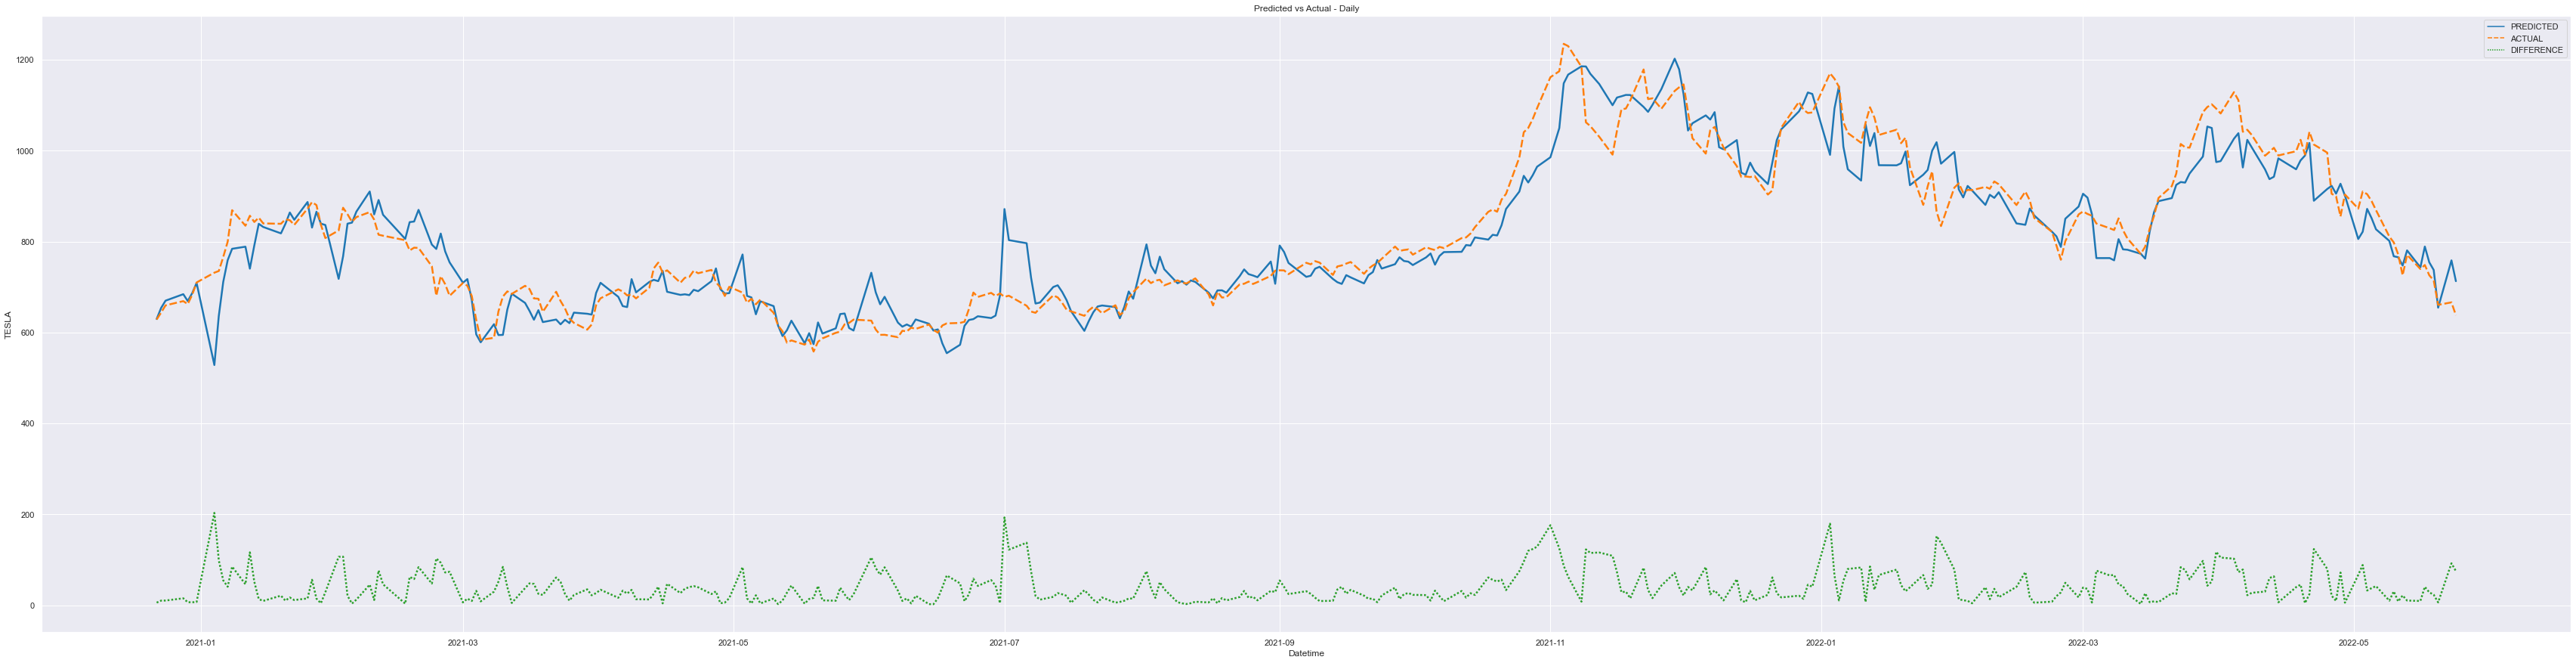

In [7]:
graph = pd.DataFrame(result.groupby('DATE')['PREDICTED','ACTUAL', 'DIFFERENCE'].mean())
graph = graph.iloc[80:,:]
plt.figure(figsize=(60,15))
linep = sns.lineplot(data = graph, palette="tab10", linewidth=2.5)
linep.set(xlabel='Datetime', ylabel='TESLA', title='Predicted vs Actual - Daily')
plt.show()

# 5. CALCULATE METRICS

In [8]:
#Check the overall RMSE value
rmse = np.sqrt(mean_squared_error(result['ACTUAL'], result['PREDICTED']))
rmse

53.61293427703086

In [9]:
#Check the overall MAPE value
mape = mean_absolute_percentage_error(result['ACTUAL'], result['PREDICTED'])
mape 

0.05414891831092778

In [10]:
#Check the mean difference
average = result.DIFFERENCE.mean()
average

39.20148376722884

In [11]:
#Check the Mean Train Time
time = result.TRAIN_DURATION.mean()
time # Seconds

0.12302654141666375

In [12]:
metrics = {'RMSE': [rmse], 'MAPE': [mape], 'MAE': [average], 'MTT': [time]}
metrics = pd.DataFrame(data = metrics, index = ['MLP'])
metrics

,RMSE,MAPE,MAE,MTT
MLP,53.612934,0.054149,39.201484,0.123027


In [21]:
#Writting files
path = '/content/drive/MyDrive/CapstoneProject/code/02. Machine Learning/output/'
graph.to_csv(path+file_name+'-GRAPH.csv', index=True)
result.to_csv(path+file_name+'-RESULT.csv', index=True)
metrics.to_csv(path+file_name+'-METRICS.csv', index=True)